# Finding My Way Towards a Great Career in Data 

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/title.png?raw=true" height="800px">

## Introduction

Hello 👋 My name is Elggak!

That's right, Elggak as in Kaggle backwards. My parents were big fans of Kaggle but they weren't exactly creative types, so... I ended up with this name! 

I'm telling you my name because if you are actually reading through this notebook, instead of just scrolling through the visualizations to get to the TLDR, it will help us establish a more personal connection, however imaginary. Don't you agree? Now, only if there was a way for me to know your name my dear friend... 

At the risk of sounding very self-centered, here is a bit more about me: I am a master's student in computer science and am going to graduate next year so I have started thinking about career options in the world of data. I have had a few conversations with experienced data professionals who work as data scientists and machine learning engineers to understand what a data job in the industry looks like. Although incredibly helpful, those conversations are inevitably limited in their scope and biased to some extent (I talked to some humans after all).

Before starting to look for a job in the world of data, I would like to understand what different career trajectories look like for various roles (e.g. data analyst vs. data scientist vs. ML engineer vs. research scientist). This includes salary ranges, required educational degrees, expected technical skills in coding and machine learning. For example, a big question I have is whether to pursue a PhD in computer science or not? Will I earn more with a PhD, and if so by how much? What kind of job do PhDs typically do? Do certain roles (e.g. research scientist) require a PhD? What should my salary expectation be for a role as an data scientist considering I am in my mid 20's and have a few years of coding experience? What technical skills should I learn if I want to land a job as an ML engineer? 


Being a data enthusiast, I believe the best way to find my way towards a great career in the world of data is, well, to use data! And yes, the title of this notebook is indeed a double entendre!


Fortunately, a lot of my fellow data enthusiasts have already answered a lot of my questions (not explicitly, but implicitly) in the [2022 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/competitions/kaggle-survey-2022/). I will use this dataset to understand different career paths and learn ways to maximize my opportunities in the fascinating world of data!






## Objectives and Caveats

I will be analyzing the data through a series of visualization panels. My primary objective for the visualizations will be to communicate a simple, yet engaging message in each panel I provide. I will try my best to keep the panels independent from each other so you can use them in isolation or small groups outside of this notebook (e.g. on your own slide deck you are presenting to your team, or your social media). Simple messages will also allow you to scroll through the panels smoothly, picking up bite sized pieces of information from each visualization, focusing on the ones that aer interesting to you and skipping ones that you don't find relevant to you.

The secondary objective will be to keep the visualization aesthetically pleasing, because let's be honest, no one wants to look at an ugly plot, no matter how informative it may be! I admit that I may not succeed in acomplishing this for all the visualizations, and may unintentionally ignore colorblind compatiblity in some of the color palettes I will use.

The tertiary objective will be to leave room for open interpretation in each of the messages I convey visually, instead of stating what I believe are facts. When I find a relationship between two different variables, I simply point them out, but it is important for you to keep in mind that I have my own biases and those will influence the way I visualize and interpret the data. This work is a visual investigation, not a rigorous statistical analysis (and we know it's easier to lie with charts that with statistics)! 

Also, you already know this but just as a reminder, when I point out relationships among variables, remember that correlation does not imply any sort of causation in either direction. If you notice any error in the panels I would appreciate it if you let me know in the comments section. And if you especially like any of the plots, please let me know about those too! 

I hope you enjoy reading/scrolling/skimming this notebook and even if you don't learn anything new from it, I hope at least you feel pleased by the time you get to the end. 

Happy scrolling! 

## Data Processing 

Here I will quietly process the data (normalize columns names and values, combine multiselect answers, etc). But honestly you are not here to see me clean up data tables so let's see each other in the next section. 

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objects as go
import plotly.express as px

import missingno as msno

from itertools import chain
from dataclasses import dataclass
from collections import Counter


### Questions and Answers

In [2]:
responses = pd.read_csv("./kaggle_survey_2022_responses.csv")\
           .drop(columns=["Duration (in seconds)"])

questions = pd.DataFrame(responses.iloc[0])
answers = responses.drop(0).reset_index(drop=True)

# create an easy reference for the question prompt 
# e.g. Q2 -> What is your age (# years)?
questions["root"] = \
pd.DataFrame(questions)\
.apply(lambda x: x.index.str.split("_"))[0]\
.apply(lambda x: x[0])\

questions = questions.rename(columns={0: "text"})

# create a reference survey class for convenience
@dataclass
class Survey:
        
    questions = questions
    answers = answers
    
    @property
    def df(self,):
        return self.answers
    
    
    @property
    def df_us_only(self,):
        # only works on the normalized columns
        return self.answers.query(f"COUNTRY=='United States of America'")
        
        

### Column and Value Mapping

In [3]:
answers.rename(
    columns={
        "Q2": "AGE",
        "Q3": "GENDER",
        "Q4": "COUNTRY",
        "Q5": "STUDENT",
        "Q8": "DEGREE",
        "Q11": "CODE_EXP",
        "Q16": "ML_EXP",
        "Q23": "JOB",
        "Q24": "INDUSTRY",
        "Q25": "COMPANY_SIZE",
        "Q29": "SALARY",
    }, inplace=True)

answers.rename(
    columns=lambda x: x\
        .replace("Q28_", "ACTIVITY_")\
        .replace("Q12_", "PROG_LANG_")\
        .replace("Q13_", "IDE_")\
        .replace("Q15_", "VIZ_TOOL_")\
        .replace("Q17_", "ML_FRAME_")\
        .replace("Q18_", "ML_ALGO_")\
        .replace("Q31_", "CC_PLATFORM_")\
        .replace("Q33_", "CC_PROD_")\
        .replace("Q34_", "CC_STORAGE_")\
        .replace("Q35_", "DATA_PROD_")\
        .replace("Q36_", "BI_TOOL_")\
        .replace("Q37_", "ML_PROD_")\
        .replace("Q39_", "ML_SERVE_")\
    ,
    inplace=True,
)


age_list = [
    '18-21',
    '22-24',
    '25-29',
    '30-34',  
    '35-39',
    '40-44',
    '45-49',
    '50-54', 
    '55-59', 
    '60-69',
    '70+',
]

degree_list = [
    'High School', 
    'Some College', 
    'Bachelor’s Degree', 
    'Master’s Degree', 
    'Doctoral Degree', 
]

# To normalize and prettify job titles
job_norm_dict = {
    'Other': np.nan,
    'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 'Data Analyst',
    'Currently not employed': np.nan,
    'Engineer (non-software)': 'Engineer',
    'Machine Learning/ MLops Engineer': 'Machine Learning Engineer',
    'Teacher / professor': 'Teacher / Professor',
    'Manager (Program, Project, Operations, Executive-level, etc)': 'Manager / Executive-level',
}

answers["JOB"].replace(job_norm_dict, inplace=True)

# to remove certain (potentially irrelevant) jobs from the analysis data
job_replace_dict = {
    'Software Engineer': np.nan,
    'Other': np.nan,
    'Developer Advocate': np.nan,
    'Data Engineer': np.nan,
    'Currently not employed': np.nan,
    'Engineer': np.nan,
    'Statistician': np.nan,
    'Data Administrator': np.nan,
    'Data Architect': np.nan,
}

answers["JOB_DATA"] = answers["JOB"].replace(job_replace_dict)

# reference list for more data related jobs we will analyze
job_data_list = [
    'Data Analyst',
    'Data Scientist', 
    'Machine Learning Engineer',
    'Research Scientist', 
    'Teacher / Professor',  
    'Manager / Executive-level',
]

# reference list for more data specific (hands-on, data sciency type) jobs we will analyze
job_data_special_list = [
    'Data Scientist', 
    'Data Analyst',
    'Machine Learning Engineer',
    'Research Scientist', 
]

# reference list for amount of coding experience
code_exp_list = [
    'I have never written code', 
    '< 1 years',
    '1-3 years', 
    '3-5 years', 
    '5-10 years', 
    '10-20 years', 
    '20+ years',
]

ml_exp_norm_dict = {
    'Under 1 year': '< 1 years', 
    '20 or more years': '20+ years',
}

ml_exp_list = [
    'I do not use machine learning methods',
    '< 1 years', 
    '1-2 years',
    '2-3 years',
    '3-4 years',
    '4-5 years', 
    '5-10 years',
    '10-20 years', 
    '20+ years',
]

answers["ML_EXP"].replace(ml_exp_norm_dict, inplace=True)

# to normalize degrees and education levels 
degree_norm_dict = {
    'Master’s degree': 'Master’s Degree',
    'Bachelor’s degree': 'Bachelor’s Degree',
    'Some college/university study without earning a bachelor’s degree': 'Some College',
    'Doctoral degree': 'Doctoral Degree',
    'I prefer not to answer': np.nan,
    'Professional doctorate': 'Doctoral Degree',
    'No formal education past high school': 'High School',
}

answers["DEGREE"].replace(degree_norm_dict, inplace=True)

# to normalize and bucket salary ranges 
salary_norm_dict = {
    '$0-999': '< $100K', 
    '1,000-1,999': '< $100K', 
    '2,000-2,999': '< $100K', 
    '3,000-3,999': '< $100K',
    '4,000-4,999': '< $100K', 
    '5,000-7,499': '< $100K',
    '7,500-9,999': '< $100K',
    '10,000-14,999': '< $100K', 
    '15,000-19,999': '< $100K', 
    '20,000-24,999': '< $100K', 
    '25,000-29,999': '< $100K', 
    '30,000-39,999': '< $100K', 
    '40,000-49,999': '< $100K',
    '50,000-59,999': '< $100K',
    '60,000-69,999': '< $100K',
    '70,000-79,999': '< $100K',
    '80,000-89,999': '< $100K', 
    '90,000-99,999': '< $100K', 
   
    '100,000-124,999': '$ 100K - 125K', 
    '125,000-149,999': '$ 125K - 150K', 
    '150,000-199,999': '$ 150K - 200K', 
    '200,000-249,999': '$ 200K - 250K',
    '250,000-299,999': '$ 250K - 300K',
    '300,000-499,999': '$ 300K - 500K',
    '$500,000-999,999': '> $500K',
    '>$1,000,000' : '> $500K' , 
}

salary_list = [
    '< $100K',
    '$ 100K - 125K',
    '$ 125K - 150K',
    '$ 150K - 200K',
    '$ 200K - 250K',
    '$ 250K - 300K',
    '$ 300K - 500K',
    '> $500K'
]

answers["SALARY_BINNED"] = answers["SALARY"].replace(salary_norm_dict)

# to normalize industry types
industry_norm_dict = {
    'Other': np.nan,
    'Non-profit/Service': np.nan, # doesn't specify service type so it can be noisy
}

answers["INDUSTRY"].replace(industry_norm_dict, inplace=True)

# reference list for company size
comp_size_list = [ 
    '0-49 employees',
    '50-249 employees',
    '250-999 employees',
    '1000-9,999 employees',
    '10,000 or more employees',
]

In [4]:

# # uncomment to get a list of all options for the multiselect column
# multi_select_col_root = "ML_ALGO"
# multi_select_col = [col for col in answers.columns if col.startswith(f"{multi_select_col_root}_") and not col.endswith("_combined")]
# set(chain(*[answers[col].unique().tolist() for col in multi_select_col]))



In [5]:
# to normalize the job activity type
activity_replace_dict = {
    'Build prototypes to explore applying machine learning to new areas': "Build Prototypes",
    'Build and/or run a machine learning service that operationally improves my product or workflows': "Run ML Service",
    'Experimentation and iteration to improve existing ML models': "Experimentation / Improve Models",
    'Analyze and understand data to influence product or business decisions': "Enhance Products and Business",
    'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data': "Build Data Infrastructure",
    'Do research that advances the state of the art of machine learning': "Research / State of the Art ML",
    'Other': np.nan,
    'None of these activities are an important part of my role at work': np.nan,
}


# dictionaries to normalize the multiselect options
# even though a lot of the mappings are identical,
# a separate dict is created for each quesiton to be explicit 
# (and in case options need to be changed later)

prog_lang_replace_dict = {
    'None': np.nan,
    'Other': np.nan,
}

ide_replace_dict = {
    'None': np.nan,
    'Other': np.nan,
}

ml_frame_replace_dict = {
    'None': np.nan,
    'Other': np.nan,
    ' JAX ': np.nan, #low count
}

ml_algo_replace_dict = {
    'None': np.nan,
    'Other': np.nan,
    'Autoencoder Networks (DAE, VAE, etc)': 'Autoencoder Networks<br>(DAE, VAE, etc.)',
    'Dense Neural Networks (MLPs, etc)': 'Dense Neural Networks<br>(MLPs, etc.)',
    'Gradient Boosting Machines (xgboost, lightgbm, etc)': 'Gradient Boosting Machines<br>(XGBoost, LightGBM, etc.)',
    'Transformer Networks (BERT, gpt-3, etc)': 'Transformer Networks<br>(BERT, gpt-3, etc)',
}

viz_tool_replace_dict = {
    ' Ggplot / ggplot2 ': 'ggplot',
    ' Plotly / Plotly Express ': 'Plotly',
    'None': np.nan,
    'Other': np.nan,
}

cc_platform_replace_dict = {
    ' Amazon Web Services (AWS) ': 'Amazon Web Services<br>(AWS)',
    ' Google Cloud Platform (GCP) ': 'Google Cloud Platform<br>(GCP)',
    'None': np.nan,
    'Other': np.nan,
}

cc_prod_replace_dict = {
    ' Amazon Elastic Compute Cloud (EC2) ': 'AWS Elastic Compute Cloud<br>(EC2) ',
     ' Google Cloud Compute Engine ': ' Google Cloud Compute Engine<br>(GCE)',
    'No / None': np.nan,
    'Other': np.nan,
}

cc_storage_replace_dict = {
    ' Amazon Simple Storage Service (S3)  ': 'AWS Simple Storage Service<br>(S3)',
    'Google Cloud Storage (GCS)   ': 'Google Cloud Storage<br>(GCS)   ',
    'No / None': np.nan,
    'Other': np.nan,
}

ml_prod_replace_dict = {
    'No / None': np.nan,
    'Other': np.nan,
}

ml_serve_replace_dict = {
    'None': np.nan,
    'Other': np.nan,
}

data_prod_replace_dict = {
    'None': np.nan,
    'Other': np.nan,
}

bi_rool_replace_dict = {
    'None': np.nan,
    'Other': np.nan,
}

# combine multiselects into lists

for col_name, replace_dict in [
    ("ACTIVITY", activity_replace_dict),
    ("PROG_LANG", prog_lang_replace_dict),
    ("IDE", ide_replace_dict),
    ("VIZ_TOOL", viz_tool_replace_dict),
    ("ML_FRAME", ml_frame_replace_dict), 
    ("ML_ALGO", ml_algo_replace_dict),
    ("CC_PLATFORM", cc_platform_replace_dict),
    ("CC_PROD", cc_prod_replace_dict),
    ("CC_STORAGE", cc_storage_replace_dict),
    ("DATA_PROD", data_prod_replace_dict),
    ("BI_TOOL", bi_rool_replace_dict),
    ("ML_PROD", ml_prod_replace_dict),
    ("ML_SERVE", ml_serve_replace_dict),
]:
    
     
    mult_sel_cols = [col for col in answers.columns if col.startswith(col_name) and col!=f"{col_name}_combined"]

    answers[mult_sel_cols] = answers[mult_sel_cols].replace(replace_dict)[mult_sel_cols]

    col_combined = \
        pd.Series(
        answers[mult_sel_cols]\
        .values\
        .tolist()
        ).apply(
            lambda x : [val for val in x if not pd.isna(val)]
    )

    answers[f"{col_name}_combined"] = col_combined

In [6]:
survey = Survey()

## Plotting Functions


In [7]:
def get_category_segment_df(
    answers_df, 
    seg_col, 
    cat_col, 
    normalize=False,
    drop_thresh=4,
    ):
    """
    returns the counts of segments within each category.
    normalizing the data will return a percentage instead.
    segments with counts smaller than drop_thresh will be dropped. 
    """
    
    cat_seg_df = answers_df.groupby([seg_col, cat_col]).size()
    cat_seg_df = cat_seg_df[cat_seg_df > drop_thresh]
    cat_seg_norm_df = (cat_seg_df.unstack()/ cat_seg_df.unstack().sum()).stack()
    
    if normalize:
        return cat_seg_norm_df * 100
    else:
        return cat_seg_df
    

def plot_category_segment_hist(
    answers_df, 
    seg_col, 
    cat_col, 
    seg_list= None,
    cat_list = None,
    replace_dict=None, 
    normalize=False,
    marker_color=None,
    orientation='v',
    area=False,
    drop_thresh=4,
    **kwargs,
    ):
    """
    plots a bar or area chart showing counts (or percentages) of segments within each category.
    this uses the get_category_segment_df() function to construct the dataftame.
    """
        
    if marker_color is None:
        marker_color = plotly.colors.sequential.YlOrRd
        
    df = answers_df.dropna(axis=0, subset=[seg_col]).copy()
    
    if replace_dict is not None:
        df = df.replace(replace_dict)
        
    cat_seg_df = get_category_segment_df(df, seg_col, cat_col, normalize=normalize, drop_thresh=drop_thresh)
    
    if seg_list is None:
        seg_list = df[seg_col].dropna().unique()
    
    groups = [cat_seg_df[seg] for seg in seg_list]
    
    if cat_list is not None:
        groups = [group.reindex(cat_list) for group in groups]
        

    def axis_flipper(group):
        
        if orientation == 'v':
            return group.index, group
        
        elif orientation == 'h':
            return group, group.index
    
    if area:
        plotter = go.Scatter
        stack_arg = dict(stackgroup='one')
    else:
        plotter = go.Bar
        stack_arg = dict()
    
    traces = [
        plotter(
            x = axis_flipper(group)[0], 
            y = axis_flipper(group)[1],
            name = seg,
            marker_color = marker_color[i],
            orientation = orientation,
            hovertext = seg,
            **stack_arg,
        )
        for i, (seg, group) in enumerate(zip(seg_list, groups))]

    fig = go.Figure(traces)

    fig.update_layout(barmode = 'stack',
                      font_family = "Tahoma",
                      font_size = 14,
                      paper_bgcolor = paper_bgcolor,
                      plot_bgcolor = plot_bgcolor,
                      title_font_size = 25,
                     **kwargs,)
    return fig

In [8]:
def windrose_plot(
    df, 
    cat_col, 
    seg_col, 
    cat_list=None, 
    seg_list=None, 
    theta_labels=None,
    marker_color=None,
    title=None,
    hovertemplate=None,
    **kwargs
    ):
    """
    create a windrose plot (radial bar chart) to show segment counts (or percentages) within each category. 
    """
    if marker_color is None:
        marker_color = plotly.colors.sequential.Greens[1:]
        
    if cat_list is None:
        cat_list = df[cat_col].unique().tolist()
    if seg_list is None:
        seg_list = df[seg_col].unique().tolist()
        
    df_plot = df.copy().set_index(cat_col)

    

    traces = [
        go.Barpolar(
            r=df_plot[df_plot[seg_col]==seg].reindex(cat_list)[0],
            name=seg,
            theta=theta_labels or cat_list,
            marker=dict(
                color=marker_color[i],

            ),
            hovertemplate=hovertemplate,
        )
        for i, seg in enumerate(seg_list)
    ]

    layout = go.Layout(
        title=title,
        font=dict(
            size=14
        ),
        legend=dict(
            font=dict(
                size=14
            )
        ),
        polar_angularaxis_rotation=90,
        height = 600,
        paper_bgcolor = paper_bgcolor,
        plot_bgcolor = plot_bgcolor,
        polar = dict(
            radialaxis = dict( showticklabels=False, ticks=''),
#         angularaxis = dict(showticklabels=False, ticks=''),
    ),
    )


    fig = go.Figure(data=traces, layout=layout)
    return fig


In [9]:
def plot_category_segment_polar(
    answers, 
    cat_col, 
    seg_col, 
    normalize=False,
    cat_list=None, 
    seg_list=None, 
    theta_labels=None,
    marker_color=plotly.colors.sequential.Greens[1:],
    drop_thresh=5,
    title=None,
    rotation=0,
    **kwargs
    ):
    """
    plots a radial bar chart showing counts (or percentages) of segments within each category.
    this uses the get_category_segment_df() function to construct the dataftame and windrose_plot() to make the plot.
    """
    
    if seg_list is None:
        seg_list = answers[seg_col].unique()
        
    cat_seg_df = get_category_segment_df(
        answers, cat_col=cat_col, seg_col=seg_col, 
        normalize=normalize,     drop_thresh=drop_thresh).reset_index()
    
    
    cat_seg_df["sorter"] = cat_seg_df[seg_col].map( {v: k for k,v in enumerate(seg_list[::-1])})
    cat_seg_df = cat_seg_df.sort_values(["sorter", 0], ascending=[False, True])

    add_percent_sign = "(%)" if normalize else ""
    fig = windrose_plot(cat_seg_df, cat_col, seg_col, 
                        cat_list = cat_list, 
                        seg_list = seg_list, 
                        theta_labels = theta_labels,
                        marker_color = marker_color,
                        title = title,
                        hovertemplate = "%{r:.1f} " + add_percent_sign + " of this category<br>are in the %{fullData.name} bracket.",
                        **kwargs) 
    fig.update_polars( angularaxis=dict(direction="clockwise", rotation=90 + rotation))
    
    return fig

## Colors

In [35]:
paper_bgcolor='rgb(245, 250, 256)'
plot_bgcolor='rgb(245, 250, 256)'

ds_blue = "#1F77B4"
da_orange = "#FF7F0E"
da_red = "#D62728"
ml_green = "#2CA02C"
ml_orange = "#FF7F0E"

rs_purple = "#9467BD"
tp_brown = "#8C564B" 
tp_grey = "#8d99ae"
mg_black = "#2b2d42"
mg_green = "#3a5a40"


purple = "#9381ff"
red = "#c32f27"
blue = "#0496ff"
orange = "#ffbc42"

d_color_list = plotly.colors.sequential.YlOrRd[1:]

j_color_list = [
    da_red,
    ds_blue,
    ml_orange,
    rs_purple,
    tp_grey,
    mg_black,
]

# Demographics

Before we jump into any deep analysis of the data, it is important to explore the **general demographics** of the participants to understand the biases our analyses will be subject to. For example, if almost all the participants are 30 something year old white males from the US, we should keep in mind that the results might not necessarily generalize to other demographics, especially minorities, across the world.

## Country

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/earth.png?raw=true" width="300px" >

In [11]:
world_df = pd.DataFrame(survey.df.groupby("COUNTRY").size().rename(index="count"))
world_df = world_df.reset_index()

In [16]:
title = """
Survey Participation Distribution Across the World<br>
<sup>most participants are from the <b>United States</b> and <b>India</b>
"""
fig = px.choropleth(world_df, 
                    locations="COUNTRY",
                    locationmode="country names",
                    color="count", 
                    hover_name="COUNTRY",
                    color_continuous_scale=px.colors.sequential.Blues,
                    range_color = [0, 3500],
                    projection = 'natural earth',
                    title=title,
                    width=900,
                   )

fig.update_layout(title_font_size = 20)
fig.show()

As evident from the distribution of the participants across the world, most are from India and the United States so the results of the analysis will be heavily biased towards these populations, especially for questions related to job markets. Since I am doing my master's in the US and will be looking for a job here after graduation, I will narrow down the results towards US whenever necessary. This is particularly important when looking at salary ranges which differ significantly across different countries. 



# Gender 

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/gender.png?raw=true" width="250" >

Let's explore distribution of gender across the survey population.

In [17]:
gender_replace_dict = {
    'Prefer not to say': np.nan,
}

g_color_list = [
    "#3366CC",
    "#DC3912",
    "#aacc00",
    "#d3d3d3",
]

In [18]:
title = """
Data Enthusiasts are <b>Predominantly Male</b> in all Age Brackets<br>
<sup> including both students and data professionals
"""
fig = plot_category_segment_hist(survey.df, 
                                 cat_col="AGE", 
                                 seg_col="GENDER", 
                                 replace_dict=gender_replace_dict,
                                 normalize=False, 
                                 marker_color=g_color_list,
                                 title=title,
                                )

fig.update_traces(hovertemplate="%{y} %{fullData.name} in this age bracket")
fig.update_layout(xaxis_title="Age", yaxis_title="Count")


fig.show()

As you probably expected to some extent, the world of data is still predominantly male as of 2022. However, if you pay attention you will notice that the ratio of women is increasing in the lower age brackets. Let's normalize the bar chart to see this effect more clearly.  

In [19]:
title = """
<b>Younger Generations</b> are Welcoming <b>More Women</b> into the Field of Data
"""

fig = plot_category_segment_hist(survey.df, 
                                 cat_col="AGE", 
                                 seg_col="GENDER", 
                                 replace_dict=gender_replace_dict,
                                 normalize=True, 
                                 marker_color=g_color_list,
                                 drop_thresh=0,
                                 title=title,
                                )

fig.update_traces(hovertemplate="%{y:.0f} (%) %{fullData.name} in this age bracket")

fig.add_annotation(x=3.5, y=110,
                  text="The ratio of women is increasing in younger generations",
                  showarrow=False,
                  )

fig.add_annotation(x=-0.2, y=110,
                   ax=50, ay=0,
                  text="",
                  showarrow=True,
                   arrowhead=5,
                   arrowwidth=1.5
                  )
fig.update_layout(xaxis_title="Age", yaxis_title="(%)")

fig.show()

The ratio of women is clearly increasing in younger generations. This looks very promising! But I wonder if this trend is universal across different job titles. Let's look at engineering jobs and compare those with the average in the plot above. 

In [25]:
# drop segments with low counts
gender_replace_mw = {
    'Prefer not to say': np.nan,
    'Nonbinary': np.nan,
    'Prefer to self-describe': np.nan,
}

# get ratio of men for the whole survey
# use this as survey average in the following plots
age_gender_df = get_category_segment_df(
    answers[["AGE", "GENDER"]].replace(gender_replace_mw).dropna(), 
    cat_col="AGE", 
    seg_col="GENDER", 
    normalize=True, )

men_survey_avg = age_gender_df.loc["Man"].values



In [24]:
engineering_job_list = ['Engineer', 'Software Engineer', 'Data Engineer', 'Machine Learning/ MLops Engineer']

title = """
<b>Engineering jobs</b> are More Male Dominated than Average<br>
<sup>but the difference seems to be diminishing in younger generations 
"""

fig = plot_category_segment_hist(
        survey.df.query(f"JOB in {engineering_job_list}"), 
        cat_col="AGE", seg_col="GENDER", 
        replace_dict=gender_replace_mw,
        normalize=True, 
        marker_color=g_color_list ,
        title=title,
)

fig.update_traces(hovertemplate="%{y:.0f} (%) %{fullData.name} in this age bracket")


for i, avg in enumerate(men_survey_avg):

    fig.add_shape(
            type="rect",
            y0= avg - 2.5 , y1=  avg + 2.5 , 
            x0= i-0.4, x1= i+ 0.4,
            fillcolor="#F3B700",
            line = dict(color = "#222", width=0.75)
        )
    
fig.add_annotation(
    x=0, y=avg-18,
    text="Survey Avg",
    font_size=11,
    showarrow=False,
)

fig.add_annotation(text='Jobs Included:<br><br>Engineer<br>Software Engineer<br>Data Engineer<br>ML Engineer',
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=1.135,
                    y=0.,
                    bordercolor='black',
                    borderwidth=0.5,
                    font_size=12,
                  )

fig.update_layout(xaxis_title="Age", yaxis_title="(%)")

fig.show()


As we can see here, the **male dominance is even stronger in engineering roles** including the selected options _Engineer_, _Software Engineer_, _Data Engineer_, and _ML Engineer_. It seems like at least the difference with the average is diminishing in younger generations as the red bars are getting closer and closer to the orange bar. Now let's compare this with academic jobs.

In [28]:
academic_job_list = ['Teacher / Professor', 'Statistician']

title = """
<b>Academic jobs </b>are Less Male Dominated than Average<br>
<sup>especially the youngest bracket which is mostly female dominated
"""

fig = plot_category_segment_hist(
    survey.df.query(f"JOB in {academic_job_list}"), 
    cat_col="AGE", seg_col="GENDER", 
    seg_list = ["Man", "Woman"],    
    replace_dict=gender_replace_mw,
    normalize=True, 
    marker_color=g_color_list ,
    title=title,
)
fig.update_traces(hovertemplate="%{y:.0f} (%) %{fullData.name} in this age bracket")

for i, avg in enumerate(men_survey_avg[1:]):

    fig.add_shape(
            type="rect",
            y0= avg - 2.5 , y1=  avg + 2.5 , 
            x0= i-0.4, x1= i+ 0.4,
            fillcolor="#F3B700",
            line = dict(color = "#222", width=0.75)
        )
    
fig.add_annotation(
    x=0, y=avg-17.2,
    text="Survey Avg",
    font_size=11,
    showarrow=False,
)

fig.add_annotation( text='Jobs Included:<br><br>Teacher / Professor<br>Statistician',
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=1.13,
                    y=0.,
                    bordercolor='black',
                    borderwidth=0.5,
                    font_size=11,
                  )

fig.update_layout(xaxis_title="Age", yaxis_title="(%)")

fig.show()


There is a clear difference here with respect to the previous plot, as academic jobs, including _Teacher / Professor_ and _Statistician_ (although technically not always in academia), seem to be heading towards less male dominance at a faster pace. 

# Educational Degree

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/degree.png?raw=true" width="300px" >

Let's explore the educational backgrounds of the participants.

In [129]:
title="""
<b>Data Student</b> Population Falls Exponentially with Age<br>
<sup> people do not commonly return to school after graduation or dropping out
"""

fig = plot_category_segment_hist(survey.df.query("STUDENT=='Yes'"),
                                 cat_col="AGE",
                                 seg_col="DEGREE", 
                                 seg_list = degree_list,
                                 normalize=False, 
                                 marker_color=d_color_list,
                                 title=title,
                                )

fig.update_traces(hovertemplate="%{y} %{fullData.name} in this age bracket")
fig.update_layout(xaxis_title="Age", yaxis_title="Count")


Not surprisingly, as we look at older age brackets we see less and less students. As much as we all love learning and taking courses and walking around the campus, we can't stay a student forever. Although the overal distribution is exponentially falling with age, different educational degree counts and ratios rise and fall at different rates. We will explore this better in a later plot.  

But how does the age distribution look like for the non students, a.k.a, the **data professionals**? 

In [85]:
title="""
<b>Data Professionals</b> are Mostly in Their Mid to Late 20's and Have a Master's Degree<br>
<sup>doctors enter the market later since they take longer to graduate
"""

fig = plot_category_segment_hist(answers.query("STUDENT=='No'"), cat_col="AGE", seg_col="DEGREE", 
                                 seg_list = degree_list,
                                 normalize=False, 
                                 marker_color=d_color_list,
                                 title=title,
                                )
fig.update_traces(hovertemplate="%{y} %{fullData.name} working professionals<br>in this age bracket")

fig.update_layout(xaxis_title="Age", yaxis_title="Count")


Great! Looks like a lot of people on the job market are in their mid 20's and have a master's degree (same as me!). It's great to see a lot of people similar to me are working in the industry as data professionals, but this also means that my position in the market is not very unique. And it looks like as I age I will be competing against more and more doctors and PhDs... 

Is it worth doing a PhD? Maybe it's something to consider, at least to stay competitive in the market. But it's a huge time investment! Will a PhD even help me make more money? Will it help me get the types of jobs than what I am interested in? 

I can always get a job after graduation and go back to school to do a PhD, right? Let's see what the data says.



In [30]:
title="""
Data Enthusiasts Rarely Pursue <b>Higher Education Degrees</b> After Their Mid 30's
"""
fig = plot_category_segment_hist(survey.df, 
                           cat_col="AGE", 
                           seg_col="DEGREE", 
                           seg_list = degree_list,
                           normalize=True, 
                           marker_color=d_color_list,
                                 title=title,
                          )
fig.update_traces(hovertemplate="%{y:.0f} (%) %{fullData.name} in this age bracket")

fig.add_annotation(x=6.8, y=113,
                  text="The percentage of higher education degrees plateus in this range"
#                    "<br>with only a slight increase in the doctoral degrees"
                   ,
                  showarrow=False,
                  )

fig.add_vrect(x0=3.5, x1=10.5,y0=-0.07,y1=.88,
              line_width=1.0, 
              line_dash="dash",)

fig.update_layout(xaxis_title="Age", yaxis_title="(%)")



Ok, assuming **ergodicity** in the underlying data, it looks like **people rarely get a higher education (i.e. go back to school) beyond their mid 30's**. This kind of makes sense, because people have more responsibilities as they get older (think job, marriage, kids) so it becomes extremely difficult if not impossible to take a break from a job or find any extra time to invest in higher education.

This plot shows some interesting trends! 

First, let's address the elephant in the room and talk about the increase in the percentage of doctors in the 60-69 and 70+ age brackets. Although this can suggest that a brave portion of the population went back to school in their 60's, this is simply not true. Looking at the previous plot we can see that the actual count of the population in these brackets is very low, so small random fluctuations get exagerrated as we normalize the data. 


The small jump in the ratio of doctors between the 30-34 to 35-49 age brackets is a probably a different story though. The actual counts in these categories are high, so it is less likely that this is a random fluctuation. Now that's interesting because for someone who doesn't take a break from education, if they finish high school at 18, finish college in 4 years, even do a master's for 2 years before starting a 6 year PhD program, they will be only 30! So you would expect the distribution above to flatten out in the 30-34 age bracket instead of 35-39. This probably suggests that at least some participants have taken a break from education at some point in their career, and went back to school. Good for them and I sincerely salute their courage! 



---
*Note*: Ergodicity in this case means we can assume the distribution through time and age brackets is more or less the same. Basically, we can assume that moving towards younger age brackets is the same as going back in time. So the bars in the plot above can be interpreted as the same group of people getting older as we move across their higher age brackets. 



# Jobs

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/job.png?raw=true" width="200" >

Now let's take a quick look at the break down of the participant's job titles on the side before making a proper fancy visualization.

In [31]:
jobs_draft = survey.df.groupby(["JOB"]).size().sort_values(ascending=False)

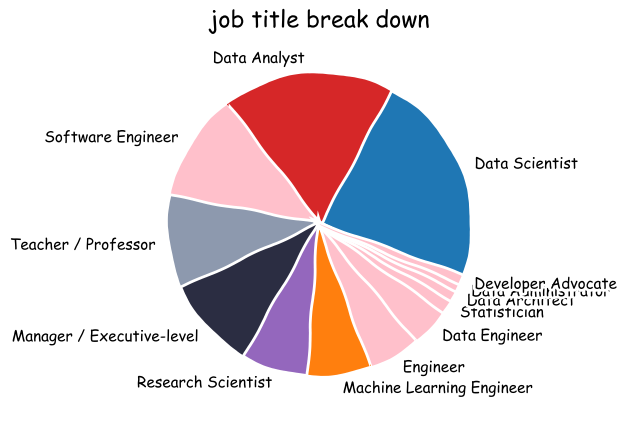

In [32]:
with plt.xkcd(0.8, length=80):
    plt.figure(figsize=(5,5),dpi=100)
    _ = plt.pie(survey.df["JOB"].value_counts(), labels=survey.df["JOB"].value_counts().index, 
                startangle=-20, 
                textprops={'fontsize': 11},
                colors=[ds_blue, da_red, "pink", tp_grey, mg_black, rs_purple, ml_orange, "pink", "pink", "pink", "pink", "pink", "pink"] )
    plt.title("job title break down")


We see there are a lot of data scientists and data analysts, a good number of research scientists and machine learning engineers along with managers and teachers. These will be the job titles I will keep for now, and will discard all the categories colored pink. The Software Engineer will be removed since it is not strictly speaking a data related job, so it might add noise to our data in terms of skills, salary, experience, etc. As for the rest, I will drop any category that has less that 500 counts in the answers. This is somewhat of an arbitrary threshold, but it allows me to focus on the career tracks I am mostly interested in.  

What about data engineering? 
It is sad to see data engineering go from the remaining analyses, but I choose to drop it from the results since it is still finding its footing in the job market. People who are doing data engineering might be a mixed lot at this point in time and to avoid any noise in the results I will postpone investigating it to another year. Sorry data engineering enthusiasts!




In [33]:
jobs_draft = survey.df.groupby(["JOB_DATA"]).size().sort_values(ascending=False)
jobs_draft = jobs_draft.loc[job_data_list]


Ok so let's look at the break down of the jobs I will be keeping.

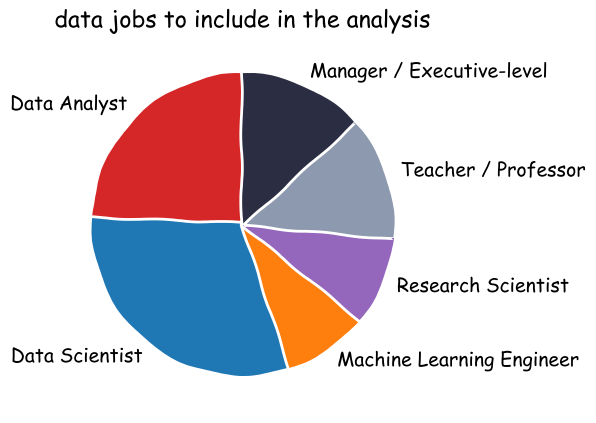

In [34]:
with plt.xkcd(0.8, length=80):
    plt.figure(figsize=(5,5),dpi=100)
    _ = plt.pie(jobs_draft, labels=jobs_draft.index, startangle=90, colors=j_color_list)
    plt.title("data jobs to include in the analysis")

Looks good! Now let's unroll this and look at the age distribution of each category.

In [36]:
title = """
<b>Age Distribution</b> of Various Data Jobs<br>
<sub>junior professionals mostly comprise of DS, DA, and ML engineers</sub><br>
<sup>while senior professionals are doing more research, teaching, and management
"""
fig = plot_category_segment_hist(survey.df, cat_col="AGE", seg_col="JOB_DATA", 
                                 normalize=True, 
                                 seg_list= job_data_list,
                                 marker_color=j_color_list,
                                 area=True,
                                 title=title,
                           )

fig.update_traces(hovertemplate="%{y:.0f} (%) are %{fullData.name}s in this age bracket")

fig.update_layout(xaxis_title="Age", 
                  yaxis_title="(%)",
                  margin_t=150,
                  height=600,
                 )
fig.show()



This is a very interesting trend. The population of data scientists, data analysts, and machine learning engineers is younger than research scientists, teachers, and managers. 

One explanation for this could be that as people become more senior, they tend to transition from DS, DA, and ML roles towards research, teaching, and management. But this hypothesis assumes ergodicity along time and age brackets, i.e. this plot using data from 10 or 20 years ago (or in the future) would look the same. Unfortunately, we don't have these datasets but even if we did it is highly unlikely that we see the exact same trends. Even using the Kaggle Survey datasets from the past few years would likely results in different ratios across age brackets (as teachers who don't like to show their work like to say: exercise for you to show!).

There are many reasons why ergodicity does not hold exactly in this case, preventing us from concluding that all DS, DA, and ML engineers naturally transision towards the other senior roles as they age throughout their career. Roles like data science and machine learning engineer are fairly new to the market (at least at the scale they are advertised and demanded right now), but they were practically non-existent 20 years ago. So it is true that perhaps some manager in their 40's started off as a DS 5 years ago and they were eventually promoted to their current role, but that does not account for the whole population of the managers. 

Furthermore, jobs like teaching (and even research to some extent) are primarily in an entirely different industry (i.e. academia) compared to the other roles, which reduces the likelyhood of transitions since most career transitions happen as a results of leveraging your network. So even though some data scientists might gravitate towards teaching as they become more senior, the small percentage of teachers in lower age brackets is likely primarily due to the fact that a huge number of DS, DA, or ML engineering roles have been attracting a large portion of the younger generation who do not have enough experience to become teachers or professors in the first place (or are not interested in it for financial reasons as we will explore later)!


It is still true that there some hierarchy exists in these jobs. Research, teaching, and management do need more experience and that's the main reason they are mostly populated by more sernior people. In order to confirm that we need to look at the relationship between _Age_ and our proxy to experience in the dataset: _Coding Experience_. 

## Coding Experience vs Age (With a Twist on Heatmaps)

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/experience.png?raw=true" width="500px" >

A common way to look for correlations between two variables in a dataset is to use heatmaps. I love heatmaps a lot but they certainly have their shortcomings. Take the relationship between age and coding experience for example. This would be the typical way of showing their corrleation:

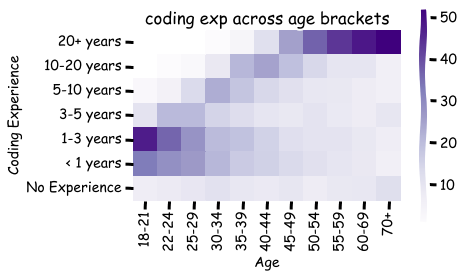

In [37]:

code_ml_exp_df=\
get_category_segment_df(survey.df, 
                        seg_col="CODE_EXP", 
                        cat_col="AGE", 
                        normalize=True,
                       ).unstack().reindex(code_exp_list[::-1])[age_list]

code_ml_exp_df.rename(columns={"I do not use machine learning methods":"No Experience"},
                      index={"I have never written code": "No Experience"},
                      inplace=True)

with plt.xkcd():
    sns.heatmap(code_ml_exp_df,
                cmap="Purples",
                square=True,
    )
    plt.xlabel("Age")
    plt.ylabel("Coding Experience")
    plt.title("coding exp across age brackets")
    
    
    

This is nice and informative, because it shows there is a relationship (positive correlation) between the two: People with more coding experience are older (duh!). But if we want to get more quantitaive we get into trouble very quickly. I can see here that roughly 50% of 18-21 year olds have 1-3 years of experience. And roughly the same percentage for 70+ age and 20+ years of experience. Wait, are they the same numbers or are they different? What about the rest of the blocks. It is really hard to see the actual percentages using the colorbar, right? 

We can play **a twist on heatmaps** by swapping the y-axis and the color axis: Since there is a natural order in the categories on the y-axis, we can assign colors with increasing intensity to the categories, and instead use the size of the blocks to show the percentages. **Our brains pick up size differences more quantitatively than color intensity differences**, so this way we can see trends as well as quantitatively measure them. 

Here's an example of the previous plot, redone as a **normalized stacked bar chart** (my twist on heatmaps).

In [38]:
title = """
<b>Coding Experience Distribution</b> Across Various Age Brackets <br>
<sup>as expected, age and experience go hand in hand
"""
fig = plot_category_segment_hist(survey.df, 
                                 seg_col="CODE_EXP", 
                                 cat_col="AGE", 
                                 normalize=True,
                                 seg_list = code_exp_list, 
                                 cat_list = age_list,
                                 marker_color=px.colors.sequential.Purp,
                                 area=False,
                                 title=title,
                           )

fig.update_traces(hovertemplate="%{y:.0f} (%) have %{fullData.name} coding experience<br>in this age bracket")


fig.update_layout(xaxis_title="Age", 
                  yaxis_title="(%)",
                 legend_title_text="Coding Experience",
                 height=700)
fig.show()

Way more beautiful, isn't it? 

Now that we confirmed there is a clear correlation between age and coding experience, let's redo the plot with job titles, this time using coding experience on the x-axis.

In [86]:
title = """
<b>Coding Experience Distribution</b> Across Various Data Jobs<br>
<sup>this follows a somewhat similar trend to age distribution

"""
fig = plot_category_segment_hist(survey.df, cat_col="CODE_EXP", seg_col="JOB_DATA", 
                           normalize=True,
                           cat_list = code_exp_list[1:], 
                           seg_list = job_data_list,
                           marker_color=j_color_list,
                           area=True,
                                 title=title,
                           )
fig.update_traces(hovertemplate="%{y:.0f} (%) are %{fullData.name}s <br>in this coding experience bracket")


fig.update_layout(xaxis_title="Coding Experience", yaxis_title="(%)")
fig.show()

Here we go. We still see some of the previous trend but to a lesser extent. 

Perhaps the more interesting piece to look at is the category not included here: people with no coding experience.


In [40]:
title = """
It is Possible to Become a Manager, Teacher, or Data Analyst<br><b>Without Any Coding Experience</b><br>
<sup>but it is practically impossible for more technical roles like DS, ML engineer, or research scientist. 
"""

fig = plot_category_segment_hist(survey.df_us_only, cat_col="CODE_EXP", seg_col="JOB_DATA", 
                           normalize=True,
                           cat_list = code_exp_list[0:1], 
                           seg_list = job_data_list,
                           marker_color=j_color_list,
                           area=False,
                                 title=title,
                           )

fig.update_traces(hovertemplate="%{y:.0f} (%) of data professionals<br>who have never written any code<br>are %{fullData.name}s")


fig.add_annotation(x=0., y=85,
                  text="Naturally",
                   font_color="white",
                  showarrow=False,
                  )


fig.add_annotation(x=0., y=60,
                  text="Understandably",
                   font_color="white",
                  showarrow=False,
                  )


fig.add_annotation(x=0., y=25,
                  text="Excel and Power BI?",
                   font_color="white",
                  showarrow=False,
                  )

fig.add_annotation(text='Note:<br>Plot only includes<br>the US population.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=0.,
                bordercolor='black',
                borderwidth=0.5,
               font_size=14,
                  )


fig.update_layout(width=650,
                  height=800,
                  yaxis_title="(%)",
                  margin_t=150,
                 )

Looking at the distribution of this category, we see that there are managers, teachers, and data analysts without any coding experience, but the other technical roles **data science, machine learning engineer, and research scientist** are entirely missing for obvious reasons. So if I want to pursue any of these careers **I would need at least a couple of years of coding experience**, which thankfully I do! 

# SALARY

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/money.png?raw=true" width="300px" >

Ok, now let's talk about money--the main reason why I'm doing this analysis in the first place. It's not because I'm superficial and only care about becoming rich. It's because I want to be happy in life and we all know money brings happiness. It's true! 


For this part of the analysis, I will narrow down the dataset to the US population only. The main reason is that since I will be looking for jobs in the US, I would like to base my expectation on current pay levels here, and not elsewhere in teh world. Aside from that, because of the differences in pay grades across the world the distribution of the salaries looks highly skewed for the while dataset:

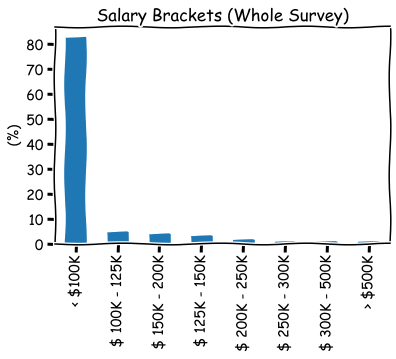

In [41]:
with plt.xkcd(scale=0.8):
    _ = survey.df["SALARY_BINNED"].value_counts(normalize=True)*100
    _.plot(kind="bar")
    plt.title("Salary Brackets (Whole Survey)")
    plt.ylabel("(%)")

Narrowing this down to the US only makes it look more reasonable and easier and more intuitive to work with.

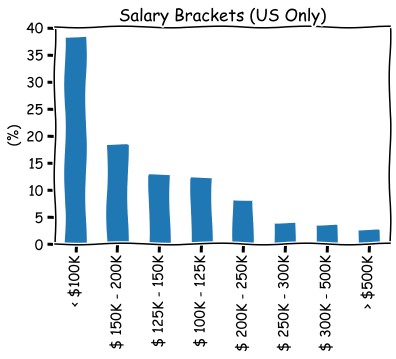

In [42]:
with plt.xkcd(scale=0.8):
    _ = survey.df_us_only["SALARY_BINNED"].value_counts(normalize=True)*100
    _.plot(kind="bar")
    plt.title("Salary Brackets (US Only)")
    plt.ylabel("(%)")

In [43]:
job_salary_list = [
    'Manager / Executive-level',
    'Machine Learning Engineer',
    'Research Scientist',
    'Data Scientist',
    'Data Analyst',
    'Teacher / Professor',
]

In [44]:
title = """
<b>Salary Brackets</b> for Various Data Jobs<br>
<sup>Managers have the highest earning potential, while teachers have the lowest
"""
fig = plot_category_segment_hist(
    survey.df_us_only, 
    cat_col="JOB_DATA", 
    seg_col="SALARY_BINNED", 
    cat_list = job_salary_list[::-1],
    seg_list = salary_list,
    normalize=True,
    marker_color=plotly.colors.sequential.Greens[1:],
    area=False,
    orientation="h",
    height=700,
    drop_thresh=3,
    title=title,
)
fig.update_traces(hovertemplate="%{x:.0f} (%) of %{y} make %{fullData.name}")

fig.add_annotation(x=1.23, y=-0.3, xref="paper",
                  text="Also the category with<br>a large ratio of women",
                  showarrow=False,
                  )

fig.add_annotation(x=1, y=0., xref="paper",
                   ax=50, ay=0,
                  text="",
                  showarrow=True,
                   arrowhead=5,
                   arrowwidth=1.5
                  )


fig.update_layout(
                  xaxis_title="(%)",
                 legend_title_text="Salary")

fig.show()

Ok great. If I had any aspirations to become a teacher or professor, this plot just obliterated it. Sadly, even though teachers and professor are among the most experienced working professionals, they have the least earning potential in salary brackets. 

The categories are sorted based on the percentage of the highest salary brackets. As we can see, managers and machine learning engineers have the highest earning potential, followed by research scientists and data scientists. 

In [45]:
title = """
<b>Highest Salaries</b> belong to Professionals in Their Mid 30's to 50's<br>
"""

fig = plot_category_segment_hist(
    survey.df_us_only,
    cat_col="AGE", 
    seg_col="SALARY_BINNED", 
    seg_list = salary_list,
    cat_list = age_list[1:],
    normalize=True,
    marker_color=plotly.colors.sequential.Greens[1:],
    area=False,
    orientation="v",
    height=700,
    drop_thresh=3,
    title=title,
)

fig.update_traces(hovertemplate="%{y:.0f} (%) of people in this age bracket<br> make %{fullData.name}")

fig.add_vrect(x0=2.5, 
              x1=6.5,
              y0=-0.05,
              y1=.98,
              line_width=1.0, 
              line_dash="dash",)


fig.update_layout(xaxis_title="Age", 
                  yaxis_title="(%)",
                 legend_title_text="Salary")
fig.show()

Looking at the salary distributions across different age brackets, I see for someone in their mid 20's (such as myself) I have a good chance of earning more than \\$100 K or even \\$125 K per year. This obviously depends on a lot of other factors (e.g. the job title as we saw in the previous plot, or geographical state, etc) but it's a good baseline for me to keep in mind. 

In [46]:
title = """
More <b>Coding Experience</b> Increases the Earning Potential<br>
<sup>the highest salary brackets belong to data proefssional with the most experience
"""



fig = plot_category_segment_hist(
    survey.df_us_only,
    cat_col="CODE_EXP", 
    seg_col="SALARY_BINNED", 
    seg_list = salary_list,
    cat_list = code_exp_list,
    normalize=True,
    marker_color=plotly.colors.sequential.Greens[1:],
    area=False,
    orientation="v",
    height=800,
    drop_thresh=4,
    title=title,
)

fig.update_traces(hovertemplate="%{y:.0f} (%) of people in this experience bracket<br> make %{fullData.name}")

fig.update_layout(xaxis_title="Coding Experience",
                  yaxis_title="(%)", 
                  legend_title_text="Salary")


fig.show()

Similar to the previous plot, I see for someone with 3-5 years of coding experience (like yours truly) I have a good chance of landing a job over \\$ 100 K or even \\$ 125 K. 

Another factor that is definitely important in increasing my earning potential is having actual machine learning experience. I suppose there is a correlation between machine learning experience and coding experience among the participants, so let's confirm that. 

In [47]:
title = """
<b>Machine Learning</b> Experts are Also Highly Skilled in <b>Coding</b><br>
<sup>
"""
fig = plot_category_segment_hist(survey.df, 
                                 seg_col="CODE_EXP", 
                                 cat_col="ML_EXP", 
                                 normalize=True,
                                 seg_list = code_exp_list[1:], 
                                 cat_list = ml_exp_list[1:-1],
                                 marker_color=px.colors.sequential.Purp,
                                 area=False,
                                 title=title,
                           )
fig.update_traces(hovertemplate="%{y:.0f} (%) of people in this age bracket<br>have %{fullData.name} of coding experience")

fig.update_layout(xaxis_title="Machine Learning Experience", 
                  yaxis_title="(%)",
                 legend_title_text="Coding Experience",
                 height=700)
fig.show()

A correlation indeed exists. For the sake of brevity, I will not show salary breakdowns among ML experience brackets and will leave that again for you as an exercise (uncomment the cell below)!

In [48]:
# title = """
# More <b>Machine Learning Experience</b> Increases the Earning Potential<br>
# <sup>the highest salary brackets belong to data proefssional with the most experience
# """



# fig = plot_category_segment_hist(
#     survey.df_us_only,
#     cat_col="ML_EXP", 
#     seg_col="SALARY_BINNED", 
#     seg_list = salary_list,
#     cat_list = ml_exp_list[:-1],
#     normalize=True,
#     marker_color=plotly.colors.sequential.Greens[1:],
#     area=False,
#     orientation="v",
#     height=800,
#     drop_thresh=4,
#     title=title,
# )

# fig.update_traces(hovertemplate="%{y:.0f} (%) of people in this experience bracket<br> make %{fullData.name}")

# fig.update_layout(xaxis_title="Machine Learning Experience",
#                   yaxis_title="(%)", 
#                   legend_title_text="Salary")


# fig.show()

In [49]:
title = """
<b>Higher Education</b> Increases the Earning Potential<br>
"""

fig = plot_category_segment_hist(
    survey.df_us_only,
    cat_col="DEGREE", 
    seg_col="SALARY_BINNED", 
    seg_list = salary_list,
    cat_list = degree_list,
    normalize=True,
    marker_color=plotly.colors.sequential.Greens[1:],
    area=False,
    orientation="v",
    height=700,
    drop_thresh=4,
    title=title,
)

fig.update_traces(hovertemplate="%{y:.0f} (%) of people in this category<br>make %{fullData.name}")

fig.update_layout(xaxis_title="Education Level", 
                  yaxis_title="(%)", 
                  legend_title_text="Salary")


fig.show()

This one is also expected. Higher education generally means a bigger paycheck.

As interesting as this plot is, I cannot emphasise enough (as you already know) that correlation does not mean causation, so people with PhDs are not getting paid more just because they have PhDs. Well maybe they do, but this plot does not necessarily show that. 

I would simply use this observation to conjecture that having higher education degrees perhaps opens up opportunities that will make it less likely to a data professional to be in the lowest salary brackets. I will use this general line of reasoning for the remainder of the visualizations that show salary breakdowns across a variety of categories (e.g. company size, industry, skillset, etc).

In [87]:
title = """
<b>Bigger Companies</b> Pay Slightly <b>Higher Salaries</b><br>
<sup>but not significantly higher
"""

fig = plot_category_segment_hist(
    survey.df_us_only,
    cat_col="COMPANY_SIZE", 
    seg_col="SALARY_BINNED", 
    seg_list = salary_list,
    cat_list = comp_size_list,
    normalize=True,
    marker_color=plotly.colors.sequential.Greens[1:],
    area=False,
    orientation="v",
    height=800,
    drop_thresh=4,
    title=title,
)
fig.update_traces(hovertemplate="%{y:.0f} (%) of people in this category<br>make %{fullData.name}")

fig.add_annotation(x=0, y=105, 
                  text="Small Startups",
                  showarrow=False,
                  )

fig.add_annotation(x=4, y=105, 
                  text="Large Corporates",
                  showarrow=False,
                  )

fig.update_layout(xaxis_title="Company Size", 
                  yaxis_title="(%)", 
                  legend_title_text="Salary")



fig.show()

Larger corporations do pay slightly more than smaller or mid sized companies, but the effect is not as large as I would naively expect. If anything, I would not let company size affect my career and job decisions in the future.  

In [51]:
title = """
<b>Earning Potentials</b> Are <b>Higher for Men</b> Than for Women<br>
<sup>aside from the lowest bracket, the percentage is higher for men in all brackets
"""
fig = plot_category_segment_hist(survey.df_us_only, 
                                 cat_col="GENDER", 
                                 seg_col="SALARY_BINNED", 
                                 seg_list = salary_list,
#                                  cat_list = comp_size_list,
                                 replace_dict={**gender_replace_mw, **{"Man": "Men", "Woman":"Women"}},
                                 normalize=True, 
                                 marker_color=plotly.colors.sequential.Greens[1:],
                                 title=title,
                                )


fig.update_traces(hovertemplate="%{y:.2f} (%) of %{x} make %{fullData.name}")

fig.add_annotation(x=1, y=55.5,
                  text="There is a gap here",
                  showarrow=False,
                  )

fig.add_vrect(x0=0.6, x1=1.4,
              y0=0.615,y1=0.95,
              line_width=1.0, 
              line_dash="dash",)

fig.update_layout(xaxis_title="Gender", 
                  yaxis_title="(%)",
                  width=700,
                  height=700,
                  margin_t=100,
                  legend_title_text="Salary")
fig.update_traces(visible="legendonly", selector=lambda t: t.name in ["< $100K"])

fig.show()

This is a well known statement, but just to confirm it, we do see a gender pay gap among the survey participants. This is another normalized bar chart (where the total is 100% for each category), but **the lowest tier has been disables to emphasize the difference in the higher tiers**, hence the gap.

I will use this trick of disabling lower tier categories again further on, to highlight categories with higher pay grades.

# Industry

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/industry.png?raw=true" width="200px" >

There are a lot of companies out there, and as we just learned it is not the size of the company that strongly determines a data professionals pay grade. So let's look at which industries pay the most, if any? 

In [52]:
title="""
<b>Salary brackets</b> Across Different Industries<br>
<sup>Online services, tech, and finance companies have the highest earning potential, while academia has the the lowest </sub>
"""
fig = plot_category_segment_polar(survey.df_us_only, 
                                  "INDUSTRY", 
                                  "SALARY_BINNED", 
                                  normalize=True, 
                                  seg_list=salary_list, 
                                  drop_thresh=0,
                                  rotation=-15,
                                  title=title,
                                 )
fig.update_layout(
    margin=dict(
        t=200,
    ),
    legend_title_text="Salary"
)

fig.show()



Looks like Online & Internet Services, Computer & Technology, and Accounting & Finance have the highest earning potential. Let's highlight them by getting rid of the lowest salary bracket with < \$ 100 K.

In [53]:
title="""
<b>Salary Brackets</b> Across Different Industries<br>
<sup>Online services, tech, and finance companies have the highest earning potential, while academia has the the least </sub>
"""
fig = plot_category_segment_polar(survey.df_us_only, 
                                  "INDUSTRY", 
                                  "SALARY_BINNED", 
                                  normalize=True, 
                                  seg_list=salary_list, 
                                  drop_thresh=0,
                                  rotation=-15,
                                  title=title,
                                 )
fig.update_layout(
    margin=dict(
        t=200,
    ),
    legend_title_text="Salary"
)
fig.update_traces(visible="legendonly", 
                  selector=lambda t: t.name in ["< $100K"])
fig.add_annotation(text='Note:<br>This is the same plot<br>as the one above, but<br>the lowest pay grade<br>has been deactivated to<br>emphasize the higher<br>salary brackets better.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.21,
                y=0.,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )

fig.show()



Voila! 


We will be using this neat trick (removing the lowest tier to highlight the higher ones through the bar length) again.

# Degree to Job Transitions

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/degree-to-job.png?raw=true" width="500px" >

To PhD or not to PhD? We saw that having a higher degree can increase my earning potential, but what kinds of jobs do PhDs typically take? Will having a PhD make more likely for me to become an ML engineer for example? What about master's graduates?  

In [89]:
# get the count of each degree that ends up in each job title
cat_1, cat_2 = "JOB_DATA", "DEGREE"
df = survey.df.groupby([cat_1, cat_2]).size().reset_index().rename(columns={0:"count"})

# let's focus on higher education
df = df.replace(
    {"High School": np.nan,
     "Some College": np.nan,
    }
).dropna()\
.reset_index(drop=True)

# normalize the counts by job title
df["weight"] = \
df.set_index(cat_1).div(
    df.groupby([cat_1])["count"]\
    .sum()\
    .reset_index()\
    .set_index(cat_1), 
    axis=0)\
.reset_index(drop=True)["count"]


# normalize the counts by degree population
df["weight_job"] = df.set_index(cat_1).div(df.groupby([cat_1])["count"].sum().reset_index().set_index(cat_1), axis=0).reset_index()["count"]




# define the nodes for the sankey plot
nodes = {
    'Doctoral Degree': 0,
    'Master’s Degree': 1,
    'Bachelor’s Degree': 2,
    
    'Teacher / Professor': 3,
    'Research Scientist': 4,
    'Machine Learning Engineer': 5,
    'Manager / Executive-level': 6,
    'Data Scientist': 7,
    'Data Analyst': 8,
    
}

labels = list(nodes.keys())


# define the sources and targets for the sankey plot
sources = df["DEGREE"].apply(lambda x : nodes[x])
targets = df["JOB_DATA"].apply(lambda x : nodes[x])

# emphasize links that are higher than 50%
df["link_color"] = df["weight"].apply(lambda x : 
                                          'rgba(79,93,117, 0.6)' if x > 0.5 
                                          else  'rgba(160, 158, 159, 0.3)' 
                                     )

# align node colors to previous colors for better intuition (hopefully!)
target_colors = list(np.array(px.colors.sequential.Greens_r)[[6,3,2,1,4,5]])
source_colors = list(np.array(px.colors.sequential.YlOrRd[1:])[[5,3,1]])


In [90]:
title = """
Flow of Higher Education <b>Degrees</b> into <b>Job Titles</b><br>
<sub>Most of academics and research scientists have PhDs,</sub><br>
<sup>while the rest mostly hold master's degrees
"""

fig = go.Figure(data=[go.Sankey(
    arrangement='freeform',
    valueformat = ".0f",
    valuesuffix = " (%)",
    node = dict(
        pad = 50,
        thickness = 15,
        line = dict(color = "grey", width = 0.5),
        label =  labels,
        x = [0.01] * 3 + [0.65, 0.81, 0.87, .95, 0.75, 0.7],
        y = [0.2, 0.55, 0.9] + [0.01,.16,0.31, .55, 0.82,1.08] ,
#         color = source_colors + target_colors,
        color = ["#bfc0c0"] * 3 + [tp_grey, rs_purple, ml_orange, mg_black, ds_blue, da_red]
    ),
    link = dict(
        source =  list(sources),
        target =  list(targets),
        value =  list(df["weight"]*100),
        color = df["link_color"],
))])


fig.add_annotation(
    xref="paper",
    yref="y domain",
    x=1,
    y=1.2,
    text="Potential for higher salary    ",
    axref="pixel",
    ayref="y domain",
    ax=-150,
    ay=1.2,
    arrowhead=5,
    showarrow=True
)

fig.add_annotation(text='Note:<br>Data is normalized by <br>job titles, so each link<br>shows the percentage<br>of the title coming from<br>each degree.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.1,
                y=-0.15,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )


fig.update_layout(title_text=title,
                  title_font_size=20, 
                  font_size=13,
                  height=900, 
                  width=1000,
                  paper_bgcolor='rgb(245, 250, 256)',
                  plot_bgcolor='rgb(245, 250, 256)',
                  autosize=False,
                  margin=dict(
                      l=50,
                      r=120,
                      b=100,
                      t=250,
                  ),
                 )

fig.update_xaxes(showgrid=False, showticklabels=False)
fig.update_yaxes(showgrid=False, showticklabels=False)

fig.show()

Looks like unless I want to teach or do research, doing a PhD does not provide a lot of additional lift. Most of the data professionals in all other job titles come with a master's background. So if I want a job as a data scientist or ML engineer, having a PhD might not necessarily help. it's also interesting to see that aside from data analysts, there are not a lot of people with bachelor's degrees in other data jobs. So next time I see an undergrad trying to decide whether doing a master's is worth it or not, I can show them this plot and the one with the earning potentials to hopefully change their mind.



But what's in a name? The job titles don't tell me exactly what I will be actually doing in each of these roles? The names are obviously indicative of that to a great extent (e.g. research scientists do research right?) but let's see if we can dig deeper into each role with the survey data. 

The participants have answered a multi-select question to indicate what activities they do as part of their job, but unfortunately there is no ranking in the answers. For example someone who builds prototypes 20% of their time and does experimentation 80% of the time and has selected both these options, ends up with the same answer as someone who does these activities with the reverse percentages. 

While it's not possible to retrieve the ranking information, it is helpful to adjust the weights of the answers before counting them for each job category. For example if someone has only selected a single option should have a higher weight for that activity than someone who has selected two (presumably with two options they are spending less total time on each activity). I will readjust the selected options using the following function:

In [91]:
def adjust_weight(x):
    return 1/ (1 +  1 * np.log(x))
#     return 1/x if x in [1, 2] else 0

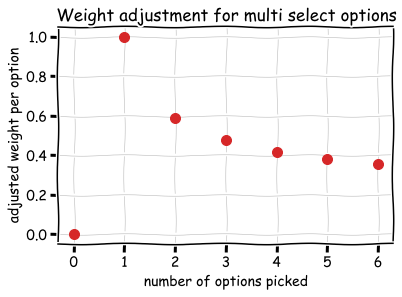

In [92]:
with plt.xkcd(scale=0.7):
    x = np.arange(0,7)
    y = adjust_weight(x)
    plt.grid(True, lw=0.5, zorder=10)
    plt.scatter(x,y , s=100, marker="o", zorder=10, color='tab:red')
    plt.ylabel("adjusted weight per option")
    plt.xlabel("number of options picked")
    plt.title("Weight adjustment for multi select options")

After adding all the weight adjusted counts for each activity within each job, we can group by the job titles and rank the final weights to identify activities as primary, secondary, tertiary, etc. 

In [93]:
# give less weight to options that have been selected along with many other options
survey.df["num_ACTIVITY"] = survey.df["ACTIVITY_combined"].apply(lambda x : len(x))
survey.df["weight_ACTIVITY"] = survey.df["num_ACTIVITY"].apply(lambda x : np.abs(adjust_weight(x)))

job_activity_df = survey.df[["JOB_DATA", "ACTIVITY_combined", "weight_ACTIVITY"]].explode("ACTIVITY_combined").dropna().reset_index(drop=True)


cat_1, cat_2 = "JOB_DATA", "ACTIVITY_combined"
df = job_activity_df.groupby([cat_1, cat_2])["weight_ACTIVITY"].sum().reset_index().rename(columns={0:"count"})

df = df.replace(
    {"Manager / Executive-level": np.nan,
     "Teacher / Professor": np.nan,
    }
).dropna()\
.reset_index(drop=True)


# normalize the counts by job title
df["weight"] = \
df.set_index(cat_1).div(
    df.groupby([cat_1])["weight_ACTIVITY"]\
    .sum()\
    .reset_index()\
    .set_index(cat_1), 
    axis=0)\
.reset_index(drop=True)["weight_ACTIVITY"]


nodes = {
    'Research Scientist': 0,
    'Machine Learning Engineer': 1,
    'Data Scientist': 2,
    'Data Analyst': 3,
    
    'Build Data Infrastructure': 4, 
    'Build Prototypes': 5,
    'Enhance Products and Business': 6,
    'Experimentation / Improve Models': 7,
    'Research / State of the Art ML': 8, 
    'Run ML Service': 9,
}

# define nodes for the sankey plot
sources = df["JOB_DATA"].apply(lambda x : nodes[x])
targets = df["ACTIVITY_combined"].apply(lambda x : nodes[x])

# rank the job titles by their percentage in the job description category
df['rank'] = df.groupby("JOB_DATA")["weight"].rank(ascending=False)

# df["link_color"] = df["weight"].apply(lambda x : f'rgba(160, 158, 159, 0.7)' if x >= 0.2 else  'rgba(160, 158, 159, 0.2)' )
df["link_color"] = df["rank"].apply(lambda x : 
                                    f'rgba(160, 158, 159, 0.8)' if x == 1.0 
                                    else (
                                        'rgba(260, 158, 159, 0.5)' 
                                        if x==2.0 
                                        else 'rgba(160, 158, 159, 0.2)'
                                    )
                                   )


# rgb(74,78,105), rgb(154,140,152)rgb(79,93,117)
# df["link_color"] = df["weight"].apply(lambda x : f'rgba(160, 158, 159, 0.7)' if x >= 0.2 else  'rgba(160, 158, 159, 0.2)' )

primary_focus_color = 'rgba(79,93,117, 0.8)'
secondary_focus_color = 'rgba(79,93,117, 0.5)' 
link_grey_color = 'rgba(160, 158, 159, 0.3)'
df["link_color"] = df["rank"].apply(lambda x : 
                                    primary_focus_color if x == 1.0 
                                    else (
                                        secondary_focus_color
                                        if x==2.0 
                                        else link_grey_color
                                    )
                                   )


labels = list(nodes.keys())

In [94]:
title = """
<b>Job Titles</b> and Their <b>Responsibilities</b><br>
<sub>Most roles focus on enhancing products and business (as they should),</sub><br>
<sup>but should data analysts be building data infrastructure?
"""
fig = go.Figure(data=[go.Sankey(
    arrangement='freeform',
    valueformat = ".0f",
    valuesuffix = " (%)",
    # Define nodes
    node = dict(
      pad = 50,
      thickness = 15,
      line = dict(color = "grey", width = 0.5),
        
      label =  labels,
#         x = [0.01] * 4, #+ [0.65, 0.88, 0.81, .95, 0.75, 0.7],
#         y = [0., 0.3, 0.5, 0.9] ,#+ [0.01,.16,0.31, .55, 0.82,1.08] ,
        
      color = [rs_purple, ml_orange, ds_blue, da_red] + ["#bfc0c0"] * 6,
    ),
    # Add links
    link = dict(
      source =  list(sources),
      target =  list(targets),
      value =  list(df["weight"]*100),
        customdata = labels,
        color = df["link_color"],

))])


fig.add_trace(
    go.Scatter(
        x=[None],
        y=[None],
        name="Primary Focus",
        showlegend=True,
        mode="lines",
        line_width=10,
            marker=dict(
                color=primary_focus_color,
#         opacity=[1, 0.8, 0.6, 0.4],
                
                sizemode="diameter"
        
            )
    )
)

fig.add_trace(
    go.Scatter(
        x=[None],
        y=[None],
        name="Secondary Focus",
        showlegend=True,
        mode="lines",
        line_width=10,
            marker=dict(
                color=secondary_focus_color,
#         opacity=[1, 0.8, 0.6, 0.4],
                
                sizemode="diameter"
        
            )
    )
)

fig.update_layout(title_text=title,
                  font_size=13, 
                  height=1000, 
                  width=1000,
                  paper_bgcolor='rgb(245, 250, 256)',
                      plot_bgcolor='rgb(245, 250, 256)',
                  
#                   autosize=False,
                 margin=dict(
        l=50,
        r=100,
        b=100,
        t=200,
        pad=4
    ),
                  legend=dict(yanchor="top",xanchor="left", x=0.01)
                 )

fig.update_xaxes(showgrid=False, showticklabels=False)
fig.update_yaxes(showgrid=False, showticklabels=False)

fig.show()




Here we go. This is interesting, but perhaps not as informative as I had hoped.  

Looks like most roles are primarily focus on enhancing products and business (as they should), but some of the secondary activities seem questionable. For example, should data analysts be building data infrastructure? I would have also expected to see a larger proportion of research scientists focused on research or experimentation... So looks like my naive guess that research scientists mostly do research was not entirely accurate! 

ML engineers seem to be focused on building prototypes and running ML services. Although ML engineer seem to be enjoying higher paychecks, this makes me question ML engineering as a career track a bit since I don't personally enjoy these activities as much as others like research and experiment for example. 

# Skills

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/skills.png?raw=true" width="400px" >

What skills do I need to become successful in my data career?

## Coding

In [62]:
salary_lang_df = survey.df_us_only[["SALARY_BINNED", "PROG_LANG_combined"]].explode("PROG_LANG_combined")


In [63]:
title="""
Most <b>Popular Programming Languages</b> and Their Earning Potentials<br>
<sup>Python, SQL, and R are the most popular languages among data professionals</sub>
"""

fig = plot_category_segment_polar(salary_lang_df,
                                  "PROG_LANG_combined", 
                                  "SALARY_BINNED",
                                  normalize=False, 
                                  seg_list=salary_list, 
                                  drop_thresh=5,
                                  rotation=-15,
                                 title=title,
                                 )
fig.update_layout(
    margin=dict(
#         l=50,
#         r=100,
#         b=100,
        t=200,
    ),
    legend_title_text="Salary"
)
fig.update_traces(visible="legendonly", 
                  selector=lambda t: t.name in ["< $100K"])
fig.update_polars(radialaxis_type="log")

fig.add_annotation(text='Note:<br>The radial axis shows<br>the absoute count on <br>a logarithmic scale.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.21,
                y=0.,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )


fig.show()



It's not a secret that Python is the most popular language in the world of data these days! I'm lucky that I have done a lot of python programming for my coursework so I should be good there. My SQL is a bit rusty though, so I better practice and learn more advanced techniques that I may not be familiar with.

Everyone seems to know Python and SQL these days, but if I wanted to add a secret weapon to my programming tool stack what would that be? 

In [64]:
title="""
Most <b>Niche Programming Languages</b> With High Earning Potentials<br>
<sup>although Bash and C++ are less commonly used, they show high earning potentials</sub>
"""

fig = plot_category_segment_polar(salary_lang_df,
                                  "PROG_LANG_combined", 
                                  "SALARY_BINNED",
                                  normalize=True, 
                                  seg_list=salary_list, 
                                  drop_thresh=5,
                                  rotation=-15,
                                 title=title,
                                 )
fig.update_layout(
    margin=dict(
#         l=50,
#         r=100,
#         b=100,
        t=200,
    ),
    legend_title_text="Salary"
)
fig.update_traces(visible="legendonly", 
                  selector=lambda t: t.name in ["< $100K", "$ 100K - 125K"])
# fig.update_polars(radialaxis_type="log")

fig.add_annotation(text='Note:<br>The radial axis shows<br>the relative percentage <br>of the salary brackets<br>within each category.<br><br>'+\
                    'The lowest pay grades<br>have been deactivated to<br>emphasize the higher<br>salary brackets better.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.21,
                y=-0.15,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )


fig.show()



Ideally the niche programming language that would make me stand out, is something that is not commonly used by a lot of data professionals, but at the same time has the ability to increase my earning potential. 

Here I am going to **define a niche as a category with the smallest percentage of the lowest tier segment**. In this particular example, it would be the programing language with the smallest percentage of the lowest pay grade < \$100 K. Since there is a natural order in salary brackets that makes it harder to get to the higher tiers, the niche naturally indicates the most profitable category.

Again, **I should emphasize that there is not necessarily a causation effect here**. Just a simple observation that certain programming languages have a higher proportion of well paid data professionals. In the normalized bar plot above these languages with the highest earning potential can be seen easily. We see Bash and C++ stand out as niche languages with high earning potential. One explanation for the higher salary bracket for these two could be that they are languages that have been around for a while, so people who know them likely are highly experienced and skilled in other areas as well. It wouldn't hurt for me to learn a bit of bash and hopefully join that crowd.



*Additional Note*: We can take the idea a step further and define ordered niches. A first order niche is the category with the lowest percentage of the first lowest tiers. A second order niche is the category with the lowest percentage of the first and second lowest tiers combined.  So on and so forth. We can easily visual these ordered niches by disabling the lowest tiers in the segments (e.g. salary bins in the above plot). The plot above shows the second order niches for programming languages.


In [65]:
exp_ide_df = survey.df[["CODE_EXP", "IDE_combined"]].explode("IDE_combined").dropna()

In [66]:
title="""
Most <b>Popular Code Editors</b> Among Data Professionals<br>
<sup>Jupyter Notebook, VS Code, and PyCharm are the most popular IDEs among data professionals</sub>
"""
fig = plot_category_segment_polar(exp_ide_df, "IDE_combined", "CODE_EXP",
                                  normalize=False, 
                                  seg_list=code_exp_list[1:], 
                                  drop_thresh=0,
                                  marker_color=plotly.colors.sequential.Purp,
                                  rotation=-15,
                                 title=title,
                                 )


fig.update_layout(
    margin=dict(
#         l=50,
#         r=100,
#         b=100,
        t=200,
    ),
    legend_title_text="Coding Experience"
)
# fig.update_traces(visible="legendonly", 
#                   selector=lambda t: t.name in ["< $100K"])
fig.update_polars(radialaxis_type="log")

fig.add_annotation(text='Note:<br>The radial axis shows<br>the absoute count on <br>a logarithmic scale.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.21,
                y=0.,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )


fig.show()



Juyter Notebook, VS Code and PyCharm are the most popular code editors. I use the former and the latter in my day to day work, so I should be also comfortable working with these IDEs as a data professional. 

In [67]:
title="""
Most <b>Niche Code Editors</b> Among Experienced Coders<br>
<sup>You know someone can code, if they are doing it in Vim or Emacs</sub>
"""

fig = plot_category_segment_polar(exp_ide_df, 
                                  "IDE_combined", 
                                  "CODE_EXP",
                                  normalize=True, 
                                  seg_list=code_exp_list[1:], 
                                  drop_thresh=0,
                                  marker_color=plotly.colors.sequential.Purp,
                                  rotation=-15,
                                 title=title,
                                 )
fig.update_layout(
    margin=dict(
#         l=50,
#         r=100,
#         b=100,
        t=200,
    ),
    legend_title_text="Coding Experience"
)
fig.update_traces(visible="legendonly", 
                  selector=lambda t: t.name in ["< 1 years", "1-3 years"])
# fig.update_polars(radialaxis_type="log")

fig.add_annotation(text='Note:<br>The radial axis shows<br>the relative percentage <br>of the experience brackets<br>within each category.<br><br>'+\
                    'The lowest code exp grades<br>have been deactivated to<br>emphasize the higher<br>exp brackets better.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.25,
                y=-0.15,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )


fig.show()






Looks like a lot of the old school programmer use Vim and Emacs. I know how to code in Vim a bit so maybe I'll try to show this off on my resume and get some extra points from the manager with 20+ years of coding experience who will be reviewing my application! :D 

Did people who started woking with Vim and Emacs back in the day never updated to newer IDEs? We humans don't like change do we? 

## Machine learning 

You may not be tired of reading, but I am definitely tired of writing! The next few plots are similar to what we've seen so far so I'll let you just scroll through them by yourself.

In [68]:
ml_frame_df = survey.df_us_only[["SALARY_BINNED", "ML_FRAME_combined"]].explode("ML_FRAME_combined")


In [69]:
title="""
Most <b>Popular Machine Learning Frameworks</b> and Their Earning Potentials<br>
<sup>Scikit-learn, TensorFlow / Keras, PyTorch, and XGBoost are the most popular ML frameworks among data professionals</sub>
"""

fig = plot_category_segment_polar(ml_frame_df, "ML_FRAME_combined", "SALARY_BINNED",
                                  normalize=False, 
                                  seg_list=salary_list, 
                                  drop_thresh=0,
                                  rotation=-15,
                                 title=title,
                                 )
fig.update_layout(
    margin=dict(
#         l=50,
#         r=100,
#         b=100,
        t=200,
    ),
    legend_title_text="Salary"
)
fig.update_traces(visible="legendonly", 
                  selector=lambda t: t.name in ["< $100K"])
fig.update_polars(radialaxis_type="log")

fig.add_annotation(text='Note:<br>The radial axis shows<br>the absoute count on <br>a logarithmic scale.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.21,
                y=0.,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )


fig.show()



In [70]:
title="""
Most <b>Niche Machine Learning Frameworks</b> With High Earning Potentials<br>
<sup>Fast.ai, LightGBM, and HuggingFace are among skills with the highest earning potentials</sub>
"""

fig = plot_category_segment_polar(ml_frame_df, "ML_FRAME_combined", "SALARY_BINNED",
                                  normalize=True, 
                                  seg_list=salary_list, 
                                  drop_thresh=0,
                                  rotation=-15,
                                 title=title,
                                 )
fig.update_layout(
    margin=dict(
#         l=50,
#         r=100,
#         b=100,
        t=200,
    ),
    legend_title_text="Salary"
)
fig.update_traces(visible="legendonly", 
                  selector=lambda t: t.name in ["< $100K"])
# fig.update_polars(radialaxis_type="log")
fig.add_annotation(text='Note:<br>The radial axis shows<br>the relative percentage <br>of the salary brackets<br>within each category.<br><br>'+\
                    'The lowest pay grades<br>have been deactivated to<br>emphasize the higher<br>salary brackets better.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.22,
                y=-0.15,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )



fig.show()



In [71]:
ml_algo_df = survey.df_us_only[["SALARY_BINNED", "ML_ALGO_combined"]].explode("ML_ALGO_combined")



In [72]:
title="""
Most <b>Popular Machine Learning Algorithms</b> and Their Earning Potentials<br>
<sup>regression models, decision trees, and gradient boosting are the most popular models among data professionals</sub>
"""

fig = plot_category_segment_polar(ml_algo_df, "ML_ALGO_combined", "SALARY_BINNED",
                                  normalize=False, 
                                  seg_list=salary_list, 
#                                   cat_list=["1", "2"],
                                  drop_thresh=0,
                                  rotation=-20,
                                 title=title,
                                 )
fig.update_layout(
    margin=dict(
        l=20,
#         r=100,
#         b=100,
        t=200,
    ),
    legend_title_text="Salary",
)
fig.update_traces(visible="legendonly", 
                  selector=lambda t: t.name in ["< $100K"])
fig.update_polars(radialaxis_type="log")

fig.add_annotation(text='Note:<br>The radial axis shows<br>the absoute count on <br>a logarithmic scale.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.21,
                y=0.,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )


fig.show()



In [95]:
title="""
Most <b>Niche Machine Learning Algorithms</b> With High Earning Potentials<br>
<sup>Transformers, Gradient Boosting Machines, and Autoencoders are among skills with the highest earning potentials</sub>
"""

fig = plot_category_segment_polar(ml_algo_df, "ML_ALGO_combined", "SALARY_BINNED",
                                  normalize=True, 
                                  seg_list=salary_list, 
                                  drop_thresh=0,
                                  rotation=-20,
                                 title=title,
                                 )
fig.update_layout(
    margin=dict(
        l=20,
#         r=100,
#         b=100,
        t=200,
    ),
    legend_title_text="Salary",
)
fig.update_traces(visible="legendonly", 
                  selector=lambda t: t.name in ["< $100K"])
# fig.update_polars(radialaxis_type="log")

fig.add_annotation(text='Note:<br>The radial axis shows<br>the relative percentage <br>of the salary brackets<br>within each category.<br><br>'+\
                    'The lowest pay grades<br>have been deactivated to<br>emphasize the higher<br>salary brackets better.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.21,
                y=-0.15,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )


fig.show()



# Tech Stack for Different Career Paths

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/career_path.png?raw=true" width="700px" >

So far we looked at coding languages, machine learning frameworks and algorithms with the highest earning potentials. But I would still like to know what basic tools I need in my tech stack to be considered competant for a career in data. Thankfully the survey participants have indicated what tools and technologies they use in their jobs, so all I need to do is to find the top ones. 

First I will look at the **top 10 skills used by all data professionals** collectively to make sure I don;t have any skill gaps in my resume. 

Next, I will find out **top 5 specialized skills for each of the career options** I have in mind (data science, data analyst, machine learning engineer, and resaerch scientist), that are not already in the previous top 10. 

I will combine technologies that are highly similar (e.g. Tensorflow/Keras/PyTorch, or Matplotlib/Seaborn) to reduce the noise in the results and point you towards skill categories rather than specific libraries. I will use the same weight adjustment I have used earlier to combine multi select questions. 

In [75]:
tech_stack_df = \
    survey.df[[
             "JOB", 
             "VIZ_TOOL_combined", 
             "ML_FRAME_combined", 
             "DATA_PROD_combined", 
             "BI_TOOL_combined", 
             "CC_PLATFORM_combined",
             "ML_PROD_combined", 
             "ML_SERVE_combined",
            ]]



tech_stack_df.loc[:, "all_skills"] = tech_stack_df.iloc[:,1:].sum(axis=1)

combine_categories_dict = {
    'Amazon Web Services<br>(AWS)': 'AWS<br>GCP<br>Azure',
    'Google Cloud Platform<br>(GCP)': 'AWS<br>GCP<br>Azure',
    ' Microsoft Azure ': 'AWS<br>GCP<br>Azure',
    'MySQL ': 'SQL Database<br>(MySQL,<br>PostgreSQL,<br>etc.)', 
    'PostgreSQL ':'SQL Database<br>(MySQL,<br>PostgreSQL,<br>etc.)',
    'SQLite ': 'SQL Database<br>(MySQL,<br>PostgreSQL,<br>etc.)',
    'Microsoft SQL Server ': 'SQL Database<br>(MySQL,<br>PostgreSQL,<br>etc.)',
    ' Matplotlib ': 'Matplotlib<br>Seaborn',
    ' Seaborn ': 'Matplotlib<br>Seaborn',
    '  TensorFlow ': 'Tensorflow<br>Keras<br>PyTorch',
    ' PyTorch ': 'Tensorflow<br>Keras<br>PyTorch',
    ' Keras ': 'Tensorflow<br>Keras<br>PyTorch',
}

counter = Counter(combine_categories_dict.values())
adjusted_weights = {k: adjust_weight(v) for k, v in counter.items()}

n_top = 10

def get_top_skills(tech_stack_df, job=None, n=10, adjusted_weights=None):
    
    tech_stack = tech_stack_df.copy()
    if adjusted_weights is None:
        adjusted_weights = {}
    
    if job is not None:
        tech_stack = tech_stack.query(f"JOB == '{job}'")
    
    all_skills = \
        tech_stack["all_skills"]\
        .explode()\
        .dropna()\
        .replace(combine_categories_dict)

    skill_weights = \
        all_skills\
        .apply(lambda x: adjusted_weights.get(x, 1.))

    all_skills.rename("skill", inplace=True)
    skill_weights.rename("skill_weights", inplace=True)
    
    skills_df = pd.concat([all_skills, skill_weights], axis=1)

    return skills_df.groupby("skill")["skill_weights"].sum().sort_values(ascending=False)[:n]


top_10_skills = get_top_skills(tech_stack_df, adjusted_weights= adjusted_weights, n=10)


n_special = 5
top_special_skills = dict()

for job in ["Data Scientist", "Research Scientist", "Data Analyst", "Machine Learning Engineer"]:
    
    skills_df = \
        get_top_skills(tech_stack_df, job=job, adjusted_weights= adjusted_weights, n=n_top+n_special)
    
    skills_df = skills_df[~skills_df.index.isin(top_10_skills.index)][:n_special]
    top_special_skills[job] = skills_df
    


x = np.arange(n_top, 0, -1) * 0.1
x = x * np.array([1, -1] * int(len(x)//2))
y = [-0.7, 1, 2, 3.2, 4.2, 5, 6, 7, 8, 9]



colors = [
    red,
    orange,
    orange,
    red,
    orange,
    red,
    blue,
    blue,
    orange,
    red,
]

In [77]:
title = """
<b>Top 10 Skills</b> Used by Data Professionals<br>
<sup>(data analysts, data scientists, machine learning engineers, research scientists)
"""

fig = go.Figure(
    data=[
        go.Scatter(
            x=x, y=y,
            text=top_10_skills.index,
            mode='markers + text',
            name = "adjusted count",
            hovertext=top_10_skills,
            hovertemplate=
                "<b>%{text}</b><br><br>" +
                "Weight adjusted count: %{hovertext:.0f}<br>" +
                "<extra></extra>",
            marker=dict(
                color=colors,
                size=2.5 * np.sqrt(top_10_skills),
                sizemode="diameter"
        
            ),
            showlegend=False,
        ),
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            name= "Visualization & Analytics",
            marker=dict(
                color=red,
                size=1.2 * np.sqrt(top_10_skills),
                sizemode="diameter"
        
            )
        ),
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            name= "Machine Learning & Modeling",
            marker=dict(
                color=orange,
                size=1.2 * np.sqrt(top_10_skills),
                sizemode="diameter"
        
            )
        ),
        go.Scatter(
            x=[None], y=[None],
            mode='markers',
            name= "Database & Cloud Orchestration",
            marker=dict(
                color=blue,
                size=1.2 * np.sqrt(top_10_skills),
                sizemode="diameter"
        
            )
        ),
    ]
)


fig.update_layout(title=title,
                  paper_bgcolor='rgb(245, 250, 256)',
                  plot_bgcolor='rgb(245, 250, 256)',
                  title_pad_b=200,
                  title_pad_t=100,
                  height=1500,
                  width=800,
                  font=dict(
                      size=14,
                  ),
                  margin_b=0,
                 legend=dict(yanchor="top",xanchor="left", x=-0.1))
fig.update_yaxes(autorange="reversed", 
                 showgrid=True,
                 showticklabels = False, 
                 showline=False, 
                 linecolor='rgb(245, 250, 256)')
fig.update_xaxes(showgrid=False, 
                 showticklabels = False, 
                 showline=False,
                 gridcolor='rgb(245, 250, 256)',
                range=(-2,2))


In [78]:
blob_color ={
    "Data Scientist": [red, orange, orange, blue, blue], 
    "Research Scientist": [orange, blue, red, orange, red], 
    "Data Analyst": [red, red, blue, blue, blue], 
    "Machine Learning Engineer": [orange, blue, blue, orange, orange],
}

for job in ["Data Scientist", "Data Analyst", "Machine Learning Engineer", "Research Scientist", ]:

    title = f"""
    <b>Top 5</b> Specialized Skills Used by <b>{job}s</b><br>
    """

    fig = go.Figure(
        data=[
            go.Scatter(
                x=x[:n_special], y=y[:n_special],
                text=top_special_skills[job].index,
                mode='markers + text',
                marker=dict(
                    color=blob_color[job],
                    size=2.1 * np.sqrt(top_10_skills),
                    sizemode="diameter"

                ),
                showlegend=False,
                hovertext=top_special_skills[job],

                hovertemplate=
                "<b>%{text}</b><br><br>" +
                "Weight adjusted count: %{hovertext:.0f}<br>" +
                "<extra></extra>",
            ),
            go.Scatter(
                x=[None], y=[None],
                mode='markers',
                name= "Visualization & Analytics",
                marker=dict(
                    color=red,
                    size=1.2 * np.sqrt(top_10_skills),
                    sizemode="diameter"

                )
            ),
            go.Scatter(
                x=[None], y=[None],
                mode='markers',
                name= "Machine Learning & Modeling",
                marker=dict(
                    color=orange,
                    size=1.2 * np.sqrt(top_10_skills),
                    sizemode="diameter"

                )
            ),
            go.Scatter(
                x=[None], y=[None],
                mode='markers',
                name= "Database & Cloud Orchestration",
                marker=dict(
                    color=blue,
                    size=1.2 * np.sqrt(top_10_skills),
                    sizemode="diameter"

                )
            ),
        ]
    )


    fig.update_layout(title=title,
                      paper_bgcolor='rgb(245, 250, 256)',
                      plot_bgcolor='rgb(245, 250, 256)',
                      title_pad_b=200,
                      title_pad_t=200,
                      height=1000,
                      width=750,
                      font=dict(
                          size=14,
                      ),
                     legend=dict(yanchor="top",xanchor="left", x=-0.1))
    fig.update_yaxes(autorange="reversed", showgrid=True,showticklabels = False, showline=False, linecolor='rgb(245, 250, 256)')
    fig.update_xaxes(showgrid=False, showticklabels = False, showline=False, gridcolor='rgb(245, 250, 256)', )
    fig.show()

The top 5 skills for each job are the most selected options by that job title that was not already in the top 10 skills in the first plot. 

It is interesting to observe the shift in the balance across Visualization & Analytics, Database & Cloud Orchestration, and Machine Learning & Modeling for the four roles. Looks like data science and research scientist are the most balanced of them all! Maybe that suggests a similarity between the two roles in general...

# Career Path

<img src="https://github.com/syasini/kaggle-survey-2022/blob/main/images/compass.png?raw=true.png" width="250px" >

So which career path is right for me? 

Aside from the considerations like salary ranges, educational degrees, industry, and tech stack, the most important factor I think I should focus on is to pursue a career that I enjoy the most. That means solving problems I care about deeply and using tools that are aligned with my passions. 

Let's construct a profile for each of the data jobs I'm considering using the same three categories I used to categorize the tech stack in the previous section.


In [80]:
skill_counts = pd.concat([tech_stack_df[col].apply(lambda x: len(x)) for col in tech_stack_df.columns[1:-1]], axis=1)

skill_counts = skill_counts.rename(columns=lambda x: x.split("_combined")[0])

skill_count_matrix = \
    tech_stack_df[["JOB"]]\
        .join(skill_counts)\
        .dropna()\
        .groupby("JOB")\
        .sum()\
        .loc[['Data Scientist', 
               'Data Analyst', 
               'Machine Learning Engineer',
               'Research Scientist',            
           ]]



skill_count_matrix["Visualization & Analytics"] = skill_count_matrix["VIZ_TOOL"] + skill_count_matrix["BI_TOOL"] 
skill_count_matrix["Database & Cloud Orchestration"] = skill_count_matrix["DATA_PROD"] + skill_count_matrix["CC_PLATFORM"] + skill_count_matrix["ML_SERVE"] 
skill_count_matrix["Machine Learning & Modeling"] = skill_count_matrix["ML_FRAME"] + skill_count_matrix["ML_PROD"] 



skill_count_matrix = skill_count_matrix[["Visualization & Analytics", 
                                         "Database & Cloud Orchestration", 
                                         "Machine Learning & Modeling"]]



skill_count_matrix = skill_count_matrix.div(skill_count_matrix.sum(axis=1),axis=0)


skill_count_matrix = skill_count_matrix*100

In [82]:
title= """
<b>Technical Skill</b> Profile of the Four Data Careers in 2022<br>
<sup>data scientist and research scientist skill profiles are highly overlapping
"""

categories = skill_count_matrix.columns
job_colors = {
    'Data Scientist': ds_blue, 
    'Data Analyst': da_red, 
    'Machine Learning Engineer': ml_orange,
    'Research Scientist': rs_purple,            
}

traces = []
for job in ['Data Scientist', 
            'Data Analyst', 
            'Machine Learning Engineer',
            'Research Scientist',            
           ]:
    
    r = skill_count_matrix.loc[job].values.tolist()
    theta=skill_count_matrix.loc[job].index.tolist()
    
    r += [r[0]] # append the first item 
    theta += [theta[0]]
    
    traces.append(
        go.Scatterpolar(
          r=r,
          theta=theta,
          name=job,
            marker_color = job_colors[job],
            line_shape="spline",
            line_width = 7,
            opacity=1,
            hovertemplate="%{r:.0f} (%) of a %{fullData.name}'s<br>tech stack includes %{theta}"
            
        ))
 

    
bg_traces = [
        go.Barpolar(
            r=[100],
            name=None,
            theta=[seg],
            width = [1],
            marker=dict(
                
                color=[red, blue, orange][i],
                opacity = 0.35,

            ),
            showlegend=False,
            hoverinfo='none',
            
        )
        for i, seg in enumerate(["Visualization & Analytics", 
                                 "Database & Cloud Orchestration", 
                                 "Machine Learning & Modeling"])
    ]

fig = go.Figure(
    data = traces,
)

fig.add_traces(bg_traces)

fig.add_annotation(text='Note:<br>The radial axis shows<br>the percentage of skills<br>used by each job title.<br>'+\
                   'it has been rescaled to <br>show the profile <br>differences better.<br><br>'+\
                    'The range goes between <br>20% to 45%.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.25,
                y=-0.15,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )


fig.update_layout(
    title=title,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[20, 45]
    )),
    showlegend=True,
    paper_bgcolor='rgb(245, 250, 256)',
    plot_bgcolor='rgb(245, 250, 256)',
    font_size=14,
    legend_title_text="Job Title"
    
)


fig.update_polars(radialaxis = dict(showticklabels=False, ticks=''), )


fig.show()

Very well. 

Looks like data analysts use a lot of visualization and analytics tools, which I obviously love. 

Ml engineering roles do a lot of machine learning, modeling, and cloud orchestration.

Research scientist and data science roles are focused more on modeling as well as visualization. 


I know I like visualization a lot, and I really enjoy modeling and putting machine learning solutions together. Seems like Research scientist and data scientist roles hit that balance better for me than the other two roles. Both have very similar tech skill profiles. Very very similar actually!

This is an interesting observation because data science seems to be an umbrella term that is typically used by companies to express different types of roles. It is similar to an analyst in certain companies, and it's more of an ML engineer in some others. Even though the meaning of the terms seems to keep shifting over the years, looks like in 2022 it is more similar to a research scientist than the other two roles.  

Let's confirm this by decomposing data science in terms of the other three roles. 



In [83]:
skill_count_matrix = skill_count_matrix.div(skill_count_matrix.pow(2).sum(axis=1).pow(0.5),axis=0)

data_science_decomposed = dict()

for component in ['Data Analyst', 
                  'Machine Learning Engineer',
                  'Research Scientist',
                 ]:
    data_science_proj = skill_count_matrix.loc["Data Scientist"].values.dot(skill_count_matrix.loc[component])
    component_norm = np.sqrt(skill_count_matrix.loc[component].values.dot(skill_count_matrix.loc[component]))
    
    data_science_decomposed[component] = 100*data_science_proj/component_norm
    


In [84]:
title= """
State of <b>Data Science</b> in 2022<br>
<sub>data science tech stack profile is the most similar to the research scientist</sub><br>
<sup>and the least similar to the data analyst role
"""



components = [
            'Data Analyst', 
            'Machine Learning Engineer',
            'Research Scientist',            
           ]

r = [data_science_decomposed[comp] for comp in components]
theta=components

r += [r[0]] # append the first item 
theta += [theta[0]]

data = \
    go.Scatterpolar(
      r=r,
      theta=theta,
      name="Data Science",
        line_shape="spline",
    line_width = 7,
        opacity=1.,
    marker_color=ds_blue,
    hoverinfo="none",
        )
    

bg_traces = [
        go.Barpolar(
            r=[200],
            name=None,
            theta=[comp],
            width = [1],
            marker=dict(
                
                color=job_colors[comp],
                opacity = 0.35,

            ),
            showlegend=False,
            hoverinfo='none',
        )
        for i, comp in enumerate(components)
    ]

fig = go.Figure(
    data = data,
)

fig.add_traces(bg_traces)


fig.add_annotation(text='Note:<br>The radial axis shows<br>similarity to job titles<br>on an arbitrary scale.<br>'+\
                   'Since the similarity <br>scores are all very close<br>the axis has been <br>rescaled to show the <br>differences better.<br><br>',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.21,
                y=-0.,
                bordercolor='black',
                borderwidth=0.5,
               font_size=11,
                  )

fig.update_layout(
    title=title,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[95.5, 100.5]
    )),
    showlegend=True,
    paper_bgcolor='rgb(245, 250, 256)',
    plot_bgcolor='rgb(245, 250, 256)',
    font_size=14,
    legend_title_text="Job Title",
    margin_r=200,
    margin_t=150,
    
)


fig.update_polars(radialaxis = dict(showticklabels=False, ticks=''), )


fig.show()

There we have it! Looks like Data Science in 2022 is more similar to a research scientist than a data analyst or a machine learning engineer!

If you look at the code closely you will see that I am actually exaggerating the effect by rescaling the radial axis, so I would be careful about reading too much into this weird decomposition I just presented to you!

# TLDR; Just Give Me the Key Takeaways!

<img src="./images/key.png" width="300px" >

We learned a lot from this dataset together! Here are some key takeaways:

**Education and Job Opportunities** 

* Most data professionals have master's degrees and are in their mid 20's. Getting a PhD could give you an upper hand to set yourself apart and increase your earning potential (unless you decide to become a professor). However, keep in mind that most people with a PhD, who are not professors, end up as research scientists so if that's not the type of work you enjoy, perhaps it's better to enter the market with a master's as soon as possible so you can gain work experience--another important factor that highly correlates with salary. 


* People rarely get higher education degrees beyond their mid 30's, so if you are master's student in your mid 20's and want to do a PhD, now is the time! It will be much harder later in life. 


* Most data professionals who work as, data scientists, machine learning engineers, and managers have a master's degree. So if you don't have one, it will be harder for you to compete in the job market. The ratio of professionals in MSc and BSc is almost a tie for data analysts roles, which unfortunately don't have high earning potentials. 
 
 
**Maximizing Salary** 

* The field of data is still heavily male dominated (more for engineering jobs and less for academic jobs), but younger generations are welcoming more women into the field. 


* If you are not a man, be aware of the gender pay gap and do your best to make sure you are being compensated fairly. The website [levels.fyi](https://www.levels.fyi/) can be a great resource for this.


* company size is not a strong predictive factor in your pay grade. If you find a small company that does something you love, go for it! And if it's a startu, you'll be getting you'll be gaining a lot of equity as well.


* Internet based, Computer/Technology, Accounting/Finance (think MAANG & Banks) are among the highest paying industries. Keep this in mind when targeting companies in your job search. 


* **Python** and **SQL** are essential for data professionals; learn **Bash** and **C++** (and code in Vim/Emacs) if you want to show off your niche skills! 


* **Regression** and **Decision Tree** based models are essential for data professionals; Learn to work with Transformers and Gradient Boosting algorithms if you want to show off your niche machine learning algorithm skills!


* **Scikit-learn**, deep learning frameworks (**Tensorflow/Keras/PyTorch**) and **XGBoost** are essential for data professionals. Learn to work with **Fast.ai**, **LightGBM**, and **HuggingFace** if you want to show off your niche machine learning framework skills!


**Optimizing Tech Stack**

* The most commonly tools used by data professionals in 2022 are **Matplotlib/Seaborn**, **Scikit-learn**, deep learning frameworks  (**Tensorflow/Keras/PyTorch**), **Plotly**, **XGBoost**, **ggplot**, Cloud technologies (**AWS/GCP/Azure**), SQL Databases **(MySQL,/PostgreSQL,/etc.)**, **LightGBM**, **Tableau**. 


* Data analysts use mostly visualization and database skills. Machine learning engineers use mostly modeling and machine learning (duh!) as well as cloud orchestration skills. Data and research scientists use a mix of visualization and modeling, with a touch of database skills. 


* The are managers outs there with no coding experience, so make sure you focus on your soft skills so you are able to communicate your technical results to a non-technical audience. This is generally true for all roles, since we saw the primary focus of most data roles is to enhance products and business. You can't do that in isolation and will need to communicate with a lot of non-technical stakeholders.
 


**What is Data Science in 2022?**

* The term "Data Scientist" in 2022 is closer to a research scientist than to data analyst or machine learning engineer. 


## The TLDR itself was too long! What's the bottom line?

* If you don't have a master's degree, try your best to get one if you can. Do a research project or get a research internship at a tech company to see if you like research. If you do, go get a PhD and apply for research scientist positions. If not, start applying for data science roles and transition towards machine learning engineering. You can always decide later if want to get into (or are fit for) management. 


# Innovations 

<img src="./images/ideas.png" width="200px" >

Throughout this analysis I have tried to use innovative ways to extarct visual insights from the survey data. here's a brief bullet point list of these innovations. 

* Using normalized bar charts with color gradients (as a twist on heatmaps) to show correlations between variables quantitatively rather than qualitatively (e.g. salary brackets for various job titles or age ranges).

* Using normalized polar bar charts (windrose diagrams) with removed low tier brackets to find niches among categories (e.g. niche programming languages or ML skills with high earning potentials). Also using radial bar charts, instead of linear ones, allows us to put a lot of categories within the visual field, making it easier to compare many at once.

* Assigning order to multiselect options by readjusting the selection weights and using the results to rank order them.


# References & Shoutouts

* All the primary visualizations have been created using [Plotly](https://plotly.com/). Their [references](https://plotly.com/python/reference/) and [tutorials](https://plotly.com/python/plotly-fundamentals/) have been an invaluable resource of all the charts you saw, and none of this work would have been possible without this fantastic open source library. The flexibility of the tool and the quality of the visualizations it provides are truly astonishing.


* The secondary visualizations (presented in [XKCD](https://xkcd.com/) style to indicate they are simply a draft) have been created using the fantastic libraries [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/). Shoutout to both for making it to top of the list of the most commonly used tools by all data professionals! (see the skills section above.)


* All the illustrations are from [blush.design](https://blush.design/). If you don't know about this website, definitely check it out. They have tons of gorgeous illustrations that are perfect for your slide decks. Big shoutout to [Jay Parera](https://www.linkedin.com/in/jai-parera/) for introducing me to this website. 

 
* I was absolutely amazed by the quality of the winning visualizations in the previous years, especially [Kaggle Survey 2021](https://www.kaggle.com/competitions/kaggle-survey-2021/), [Kaggle Survey 2020](https://www.kaggle.com/competitions/kaggle-survey-2020/), [Kaggle Survey 2019](https://www.kaggle.com/competitions/kaggle-survey-2019/), and found a lot of inspiration in several fantastic winning notebooks such as these

 [Enthusiast to data professional what changes?](https://www.kaggle.com/code/spitfire2nd/enthusiast-to-data-professional-what-changes/notebook)
 
 [Data Scientists Analysts What's the Difference?](https://www.kaggle.com/code/spitfire2nd/data-scientists-analysts-what-s-the-difference/notebook)
 
 [Treasure Hunt: What Gives to be Really Good?](https://www.kaggle.com/code/andradaolteanu/treasure-hunt-what-gives-to-be-really-good/notebook)
 
 [Data Science in 2021: Adaptation or Adoption](https://www.kaggle.com/code/shivamb/data-science-in-2021-adaptation-or-adoption/notebook)
 
 [How are the Ladies and the Gents Doing?](https://www.kaggle.com/code/andradaolteanu/how-are-the-ladies-and-the-gents-doing/notebook)

 just to name a few. I encourage you to check them out if you haven't already. 


* I have also found these articles to be a source of inspiration, forming some of the questions I tried to answer here

 [Kaggle State of Data Science and Machine Learning 2022 Executeive Summary](https://www.kaggle.com/kaggle-survey-2022) (this is how I found out about this competition in the first place)
 [Anaconda 2022 State of Data Science Report ](https://www.anaconda.com/state-of-data-science-report-2022)
 [11 Data Scientist Skills Employers Want to See in 2022](https://bootcamp.berkeley.edu/blog/data-scientist-skills/)

 [Top Skills for Data Scientists in 2022](https://www.linkedin.com/pulse/top-skills-data-scientists-2022-michael-spencer-/)

 [Data Science: Is a Master's Enough, or Do I Need a PhD?](https://www.noodle.com/articles/data-science-education#:~:text=However%2C%20a%20PhD%20in%20data,master's%2C%20though%20it's%20extremely%20difficult.)

 [How Much Do Data Scientists Make?](https://www.indeed.com/career-advice/pay-salary/how-much-do-data-scientists-make#:~:text=Arizona%3A%20%24135%2C350%20per%20year,Colorado%3A%20%24117%2C137%20per%20year)


* All the data used here are from the [Kaggle Survey 2022](https://www.kaggle.com/competitions/kaggle-survey-2022/). No additional data sources were used in this analysis intentionally, as a challenge to maximize the amount of information that can be extracted (in certain categories) form the survey simply by itself. It is definitely worth augmenting this analysis with other data sources to identify biases and cover blindspots. One invaluable resouce would be job listings for various roles to extract and compare potential salaries (if available), and required skills. This [previous prize winner](https://www.kaggle.com/code/andresionek/is-there-any-job-out-there-kaggle-vs-glassdoor/notebook) provides a Glassdoor scraping tool that would be perfect for this purpose. maybe something for me to try next year?


* And finally, a big thanks to my creator, [Siavash Yasini](https://www.linkedin.com/in/siavash-yasini/), who made me up my character in his mind (even though it was completely unnecessary) and spent many hours, late at night, putting everything together in this notebook passionately and is really hoping that he would get at least an honorable mention in the competition! But even if he doesn't, it's ok because he really really enjoys data visualization and storytelling. He hopes that the insights he provided for you can become valuable decision making tools for you to find your way towards a better career in data (with data)!


Don't forget to upvote the notebook if you made it this far! It would mean a lot. 

Thanks for taking the time to look at my visualization and I sincerely hope you enjoyed and learned something from them.